In [1]:
import sys, os
sys.path.append(os.path.abspath('../classifiers'))
sys.path.append(os.path.abspath('../training'))
sys.path.append(os.path.abspath('../validation'))
from validation_functions import execute_training_test_k_fold
from classifiers_ICQ import iqc_classifier
from iqc_classifier_training import IQCClassifier
from prediction_visualization import decision_visualization

from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import datasets

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
def get_dataset():
    # Dá pra usar caminhos relativos, não tem pra quê colocar tudo de uma vez não
    path_to_datasets = "../datasets/Datasets_template_exp/" 
    dataset_name = "xor.npy"
    dataset = np.load(path_to_datasets + dataset_name)

    X, y = dataset[:,:-1],dataset[:,-1]
    return X, y

In [3]:
X, y = get_dataset()
classifier_function = iqc_classifier
dic_classifier_params = {}
dic_classifier_params["sigma_q_params"] = [1,1,1,1]
dic_classifier_params["use_polar_coordinates_on_sigma_q"] = False
dic_classifier_params["load_inputvector_env_state"] = True
dic_classifier_params["normalize_axis"] = 1

dic_training_params = {"max_iter": 1000,
    "accuracy_succ": 0.99,
    "plot_graphs_and_metrics": True,
    "plot_graphs_in_classifier": True,
    "random_seed": 1,
    "learning_rate": 0.01,
    "refit_db":True,
    "reset_weights_epoch":0,
    "do_classes_refit":True,
    "batch":False}


print_each_fold_metric=True
print_avg_metric=True


n_times_kfold = 20
k_times_fold = 10

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
normalized_X_train = normalize(X_train,axis=1)
normalized_X_test  = normalize(X_test, axis=1)

In [5]:
sigmaq_range = range(50)

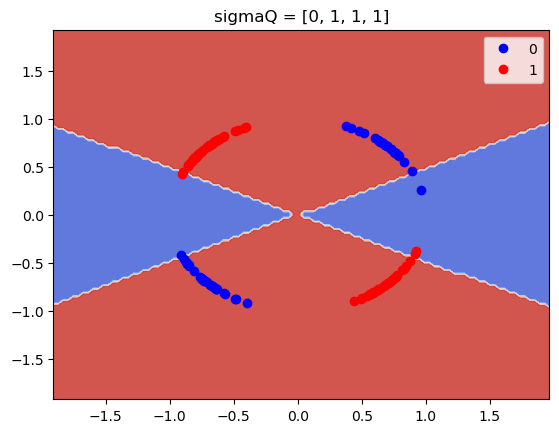

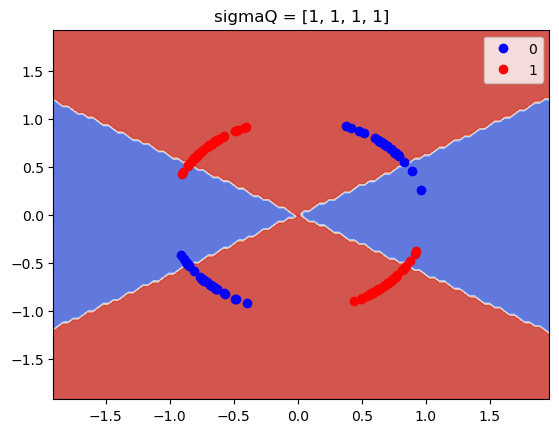

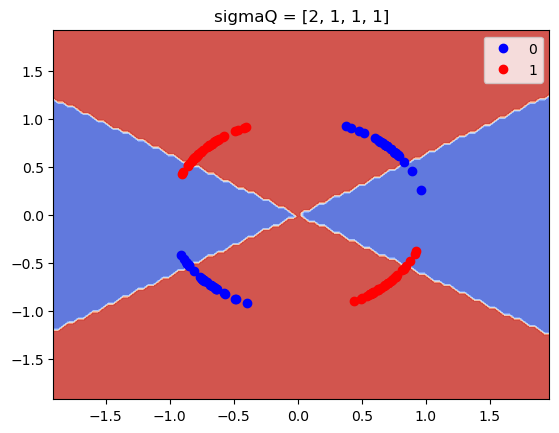

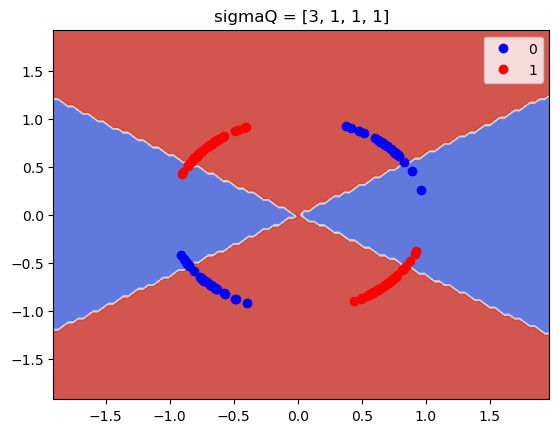

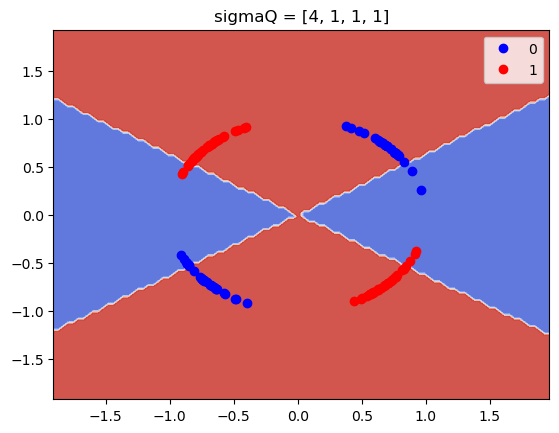

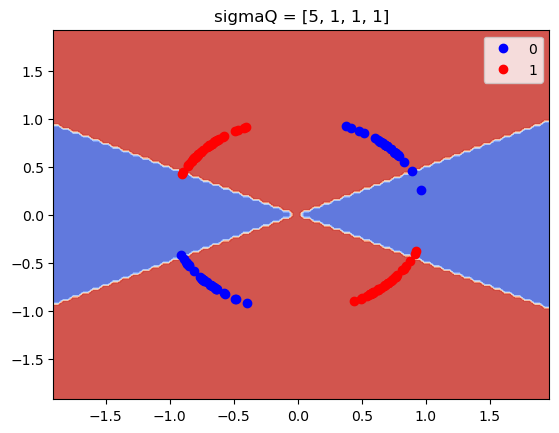

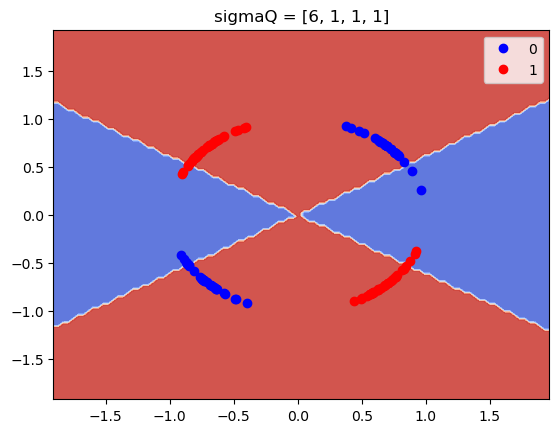

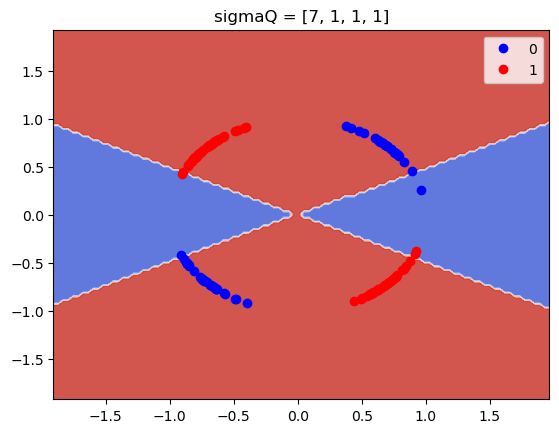

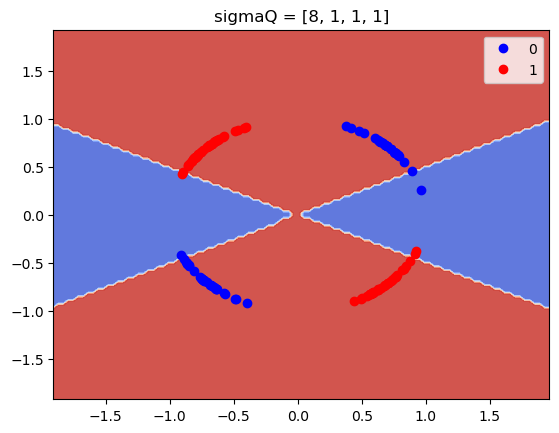

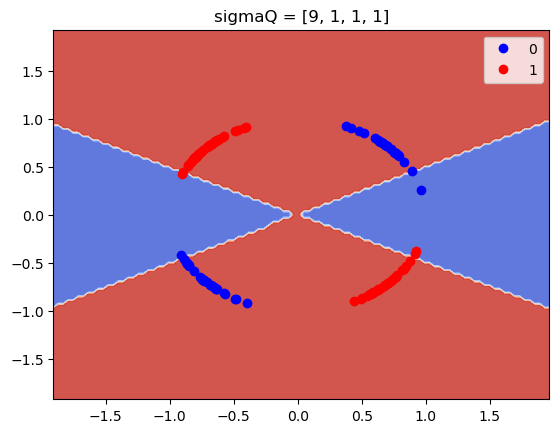

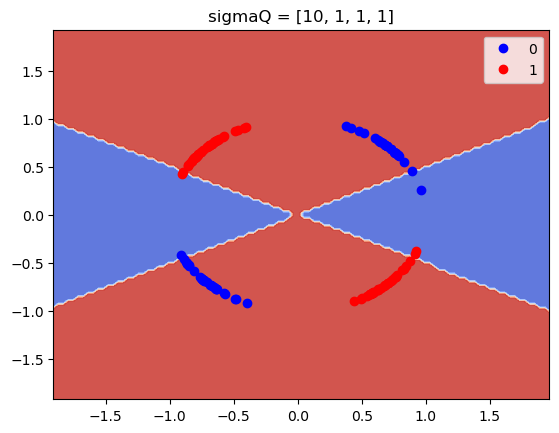

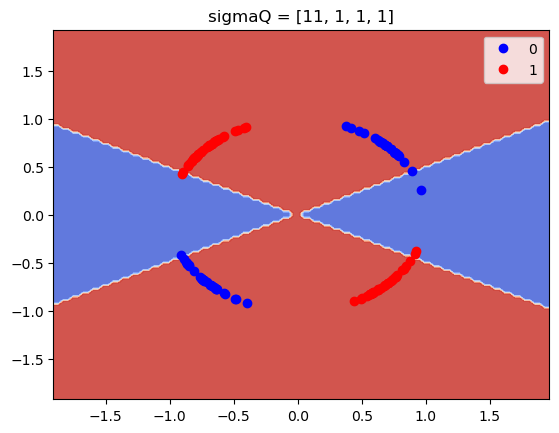

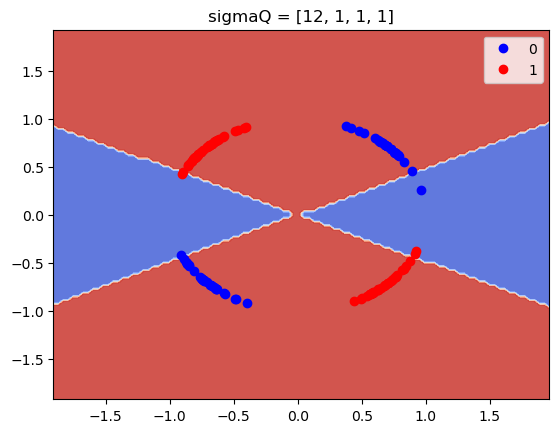

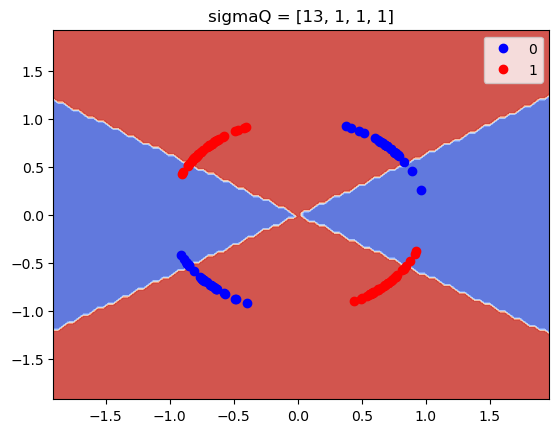

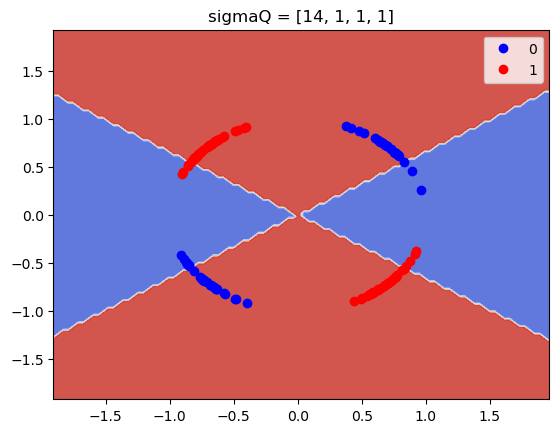

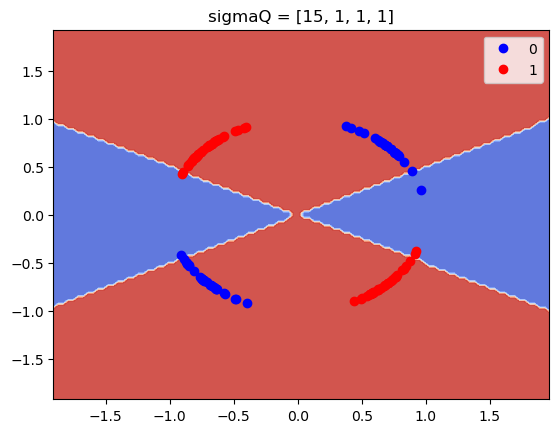

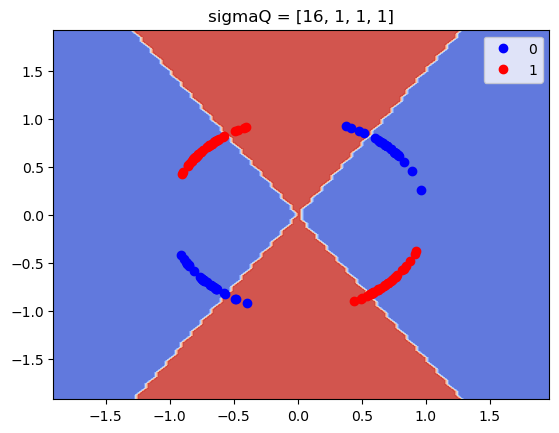

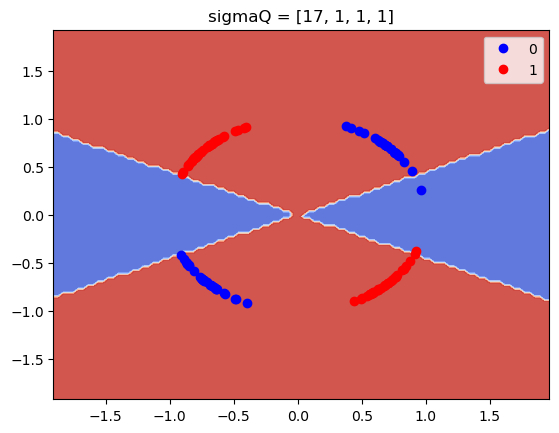

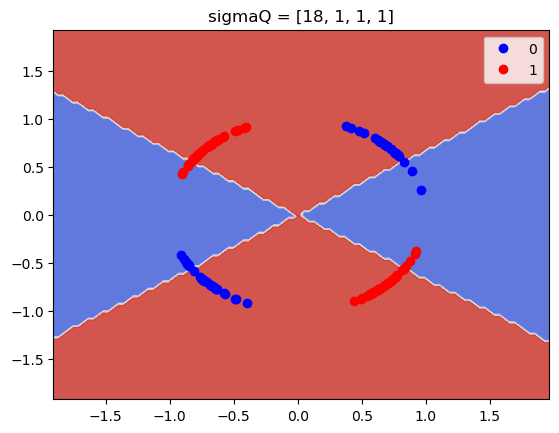

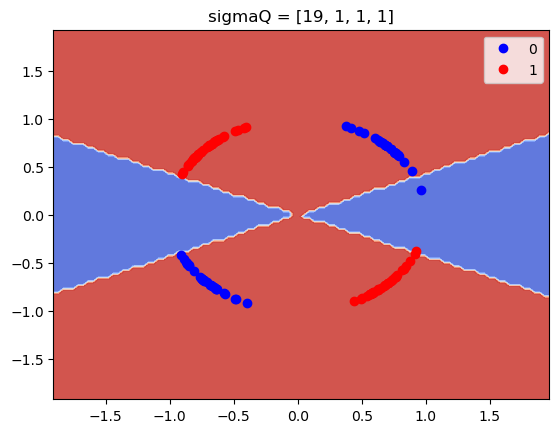

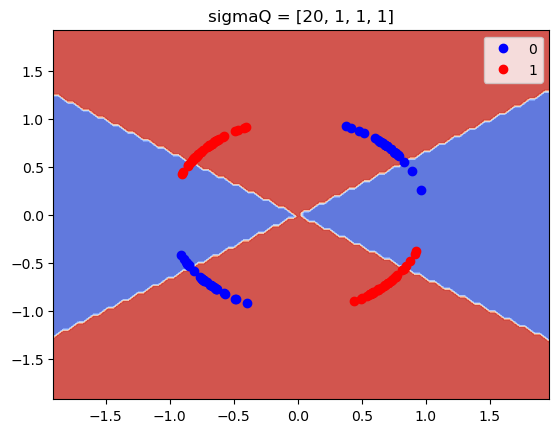

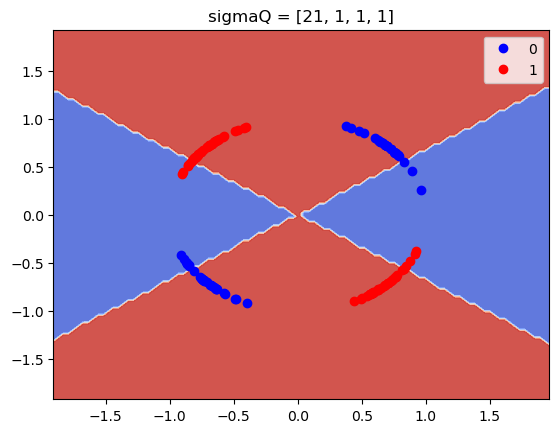

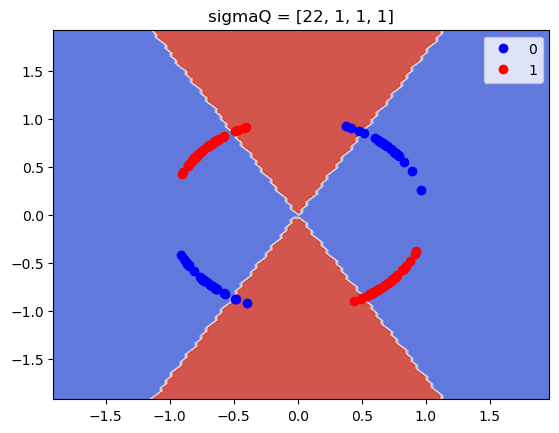

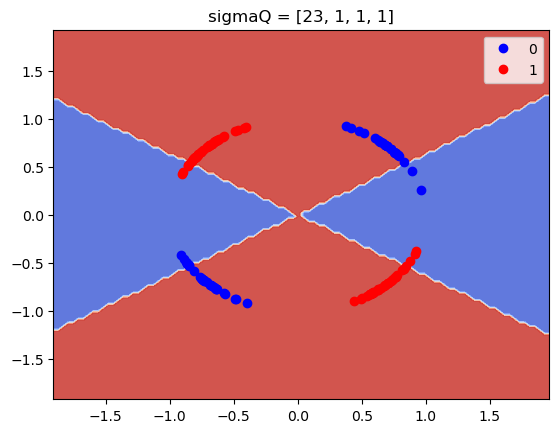

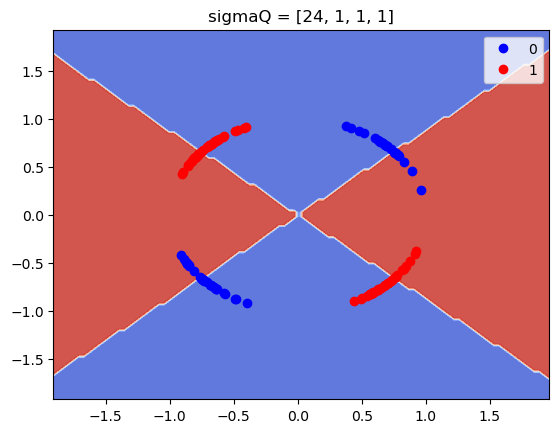

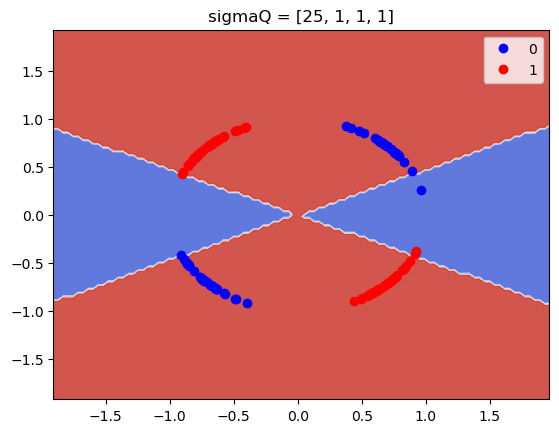

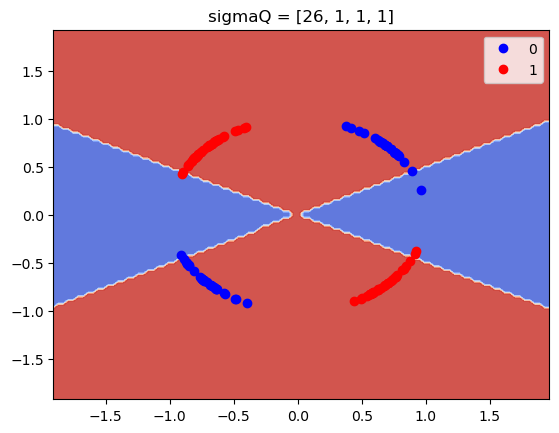

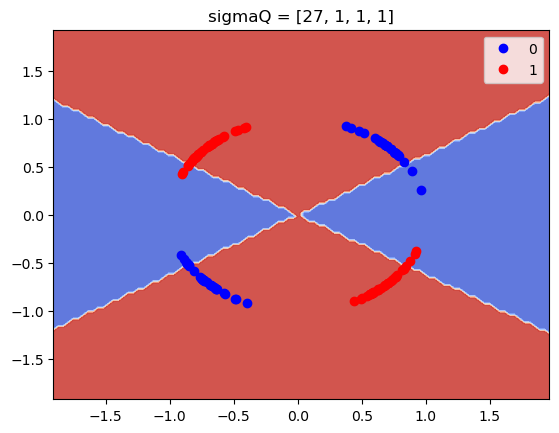

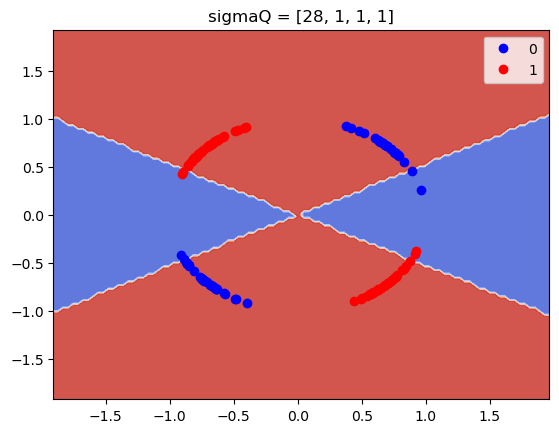

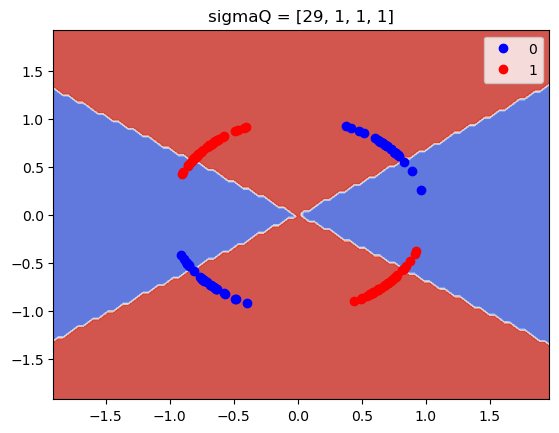

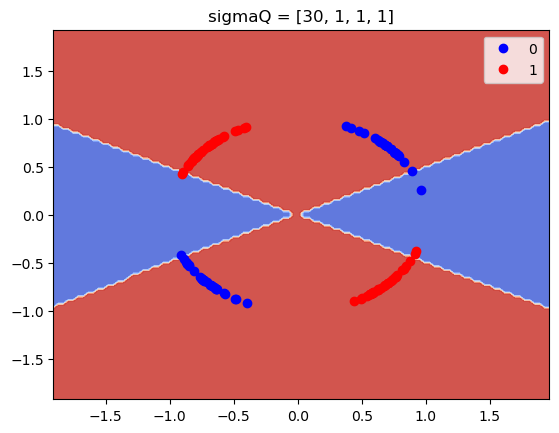

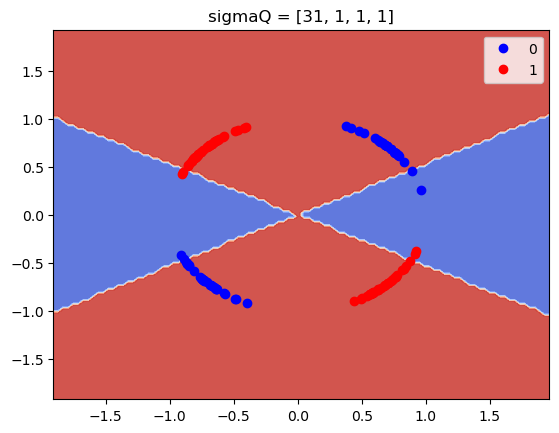

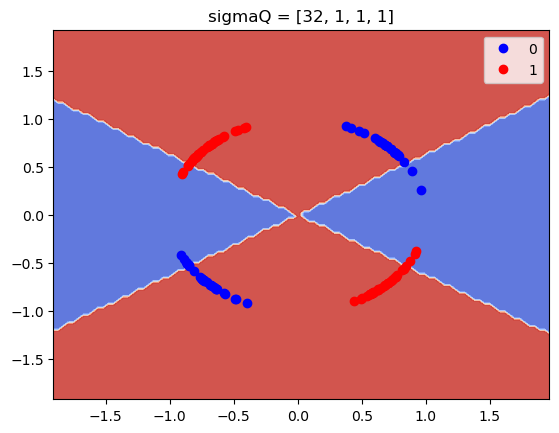

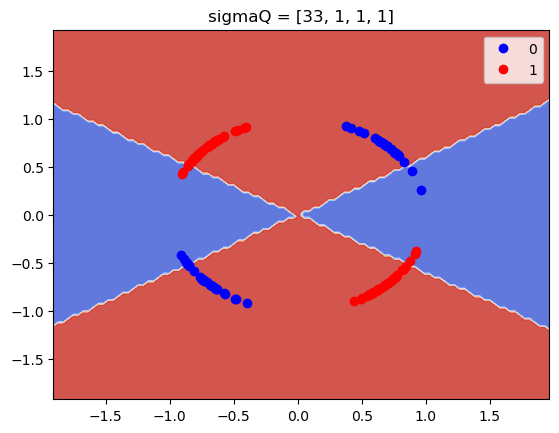

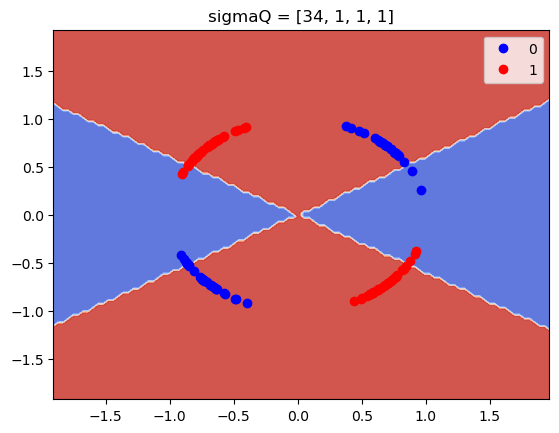

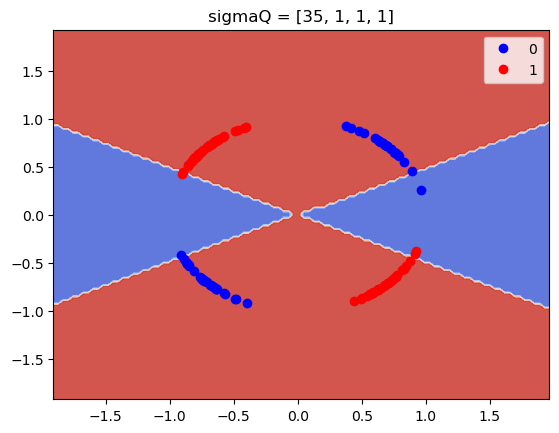

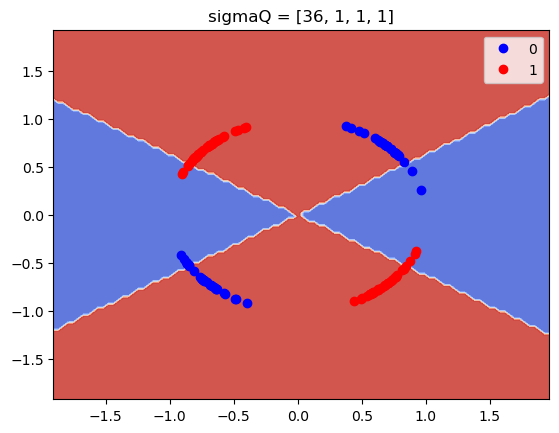

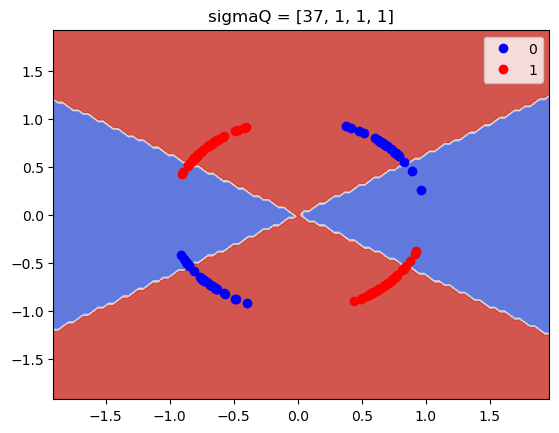

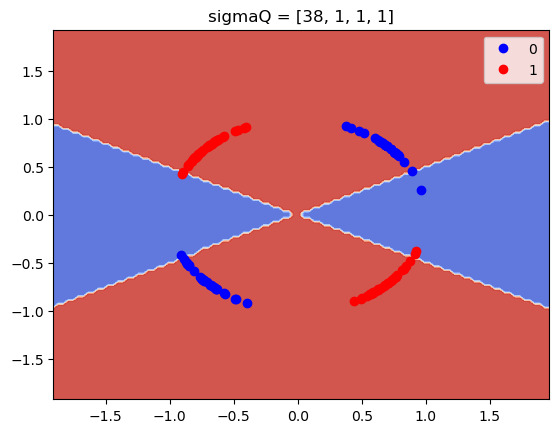

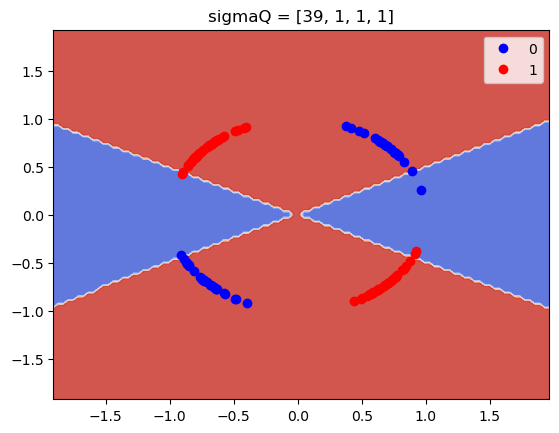

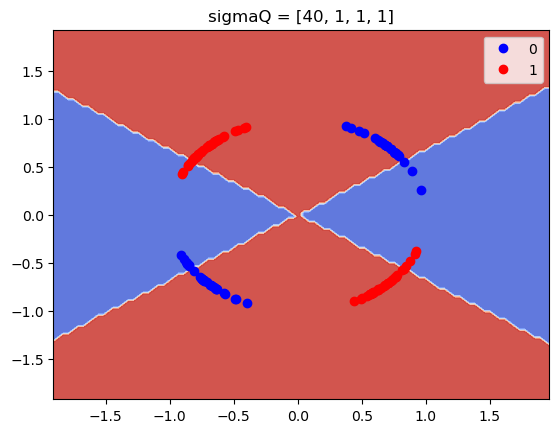

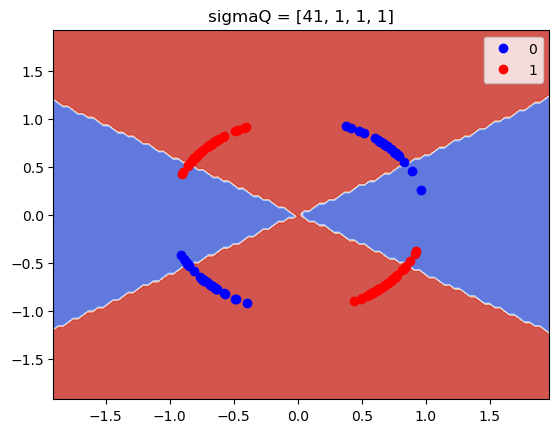

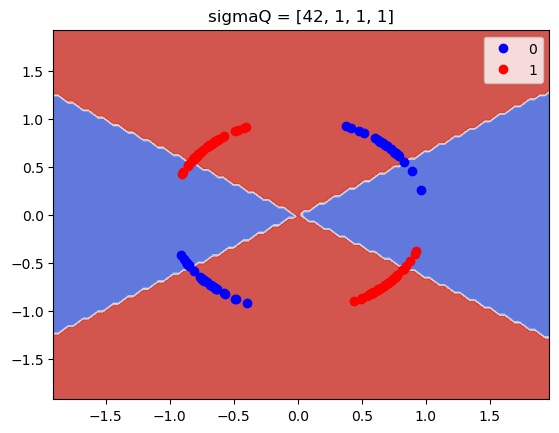

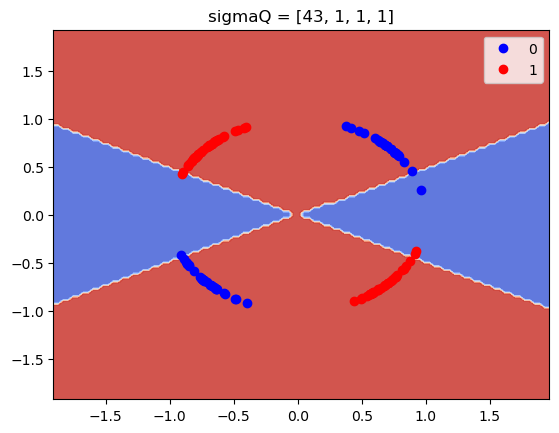

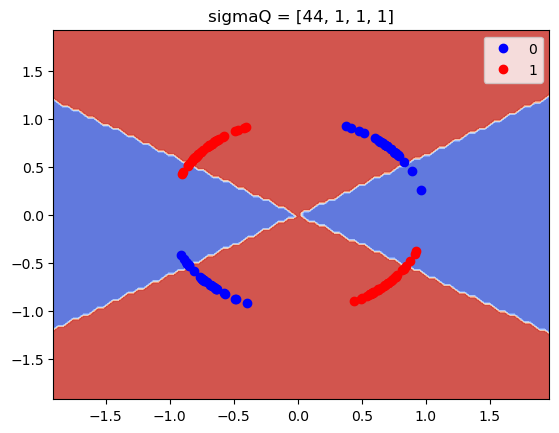

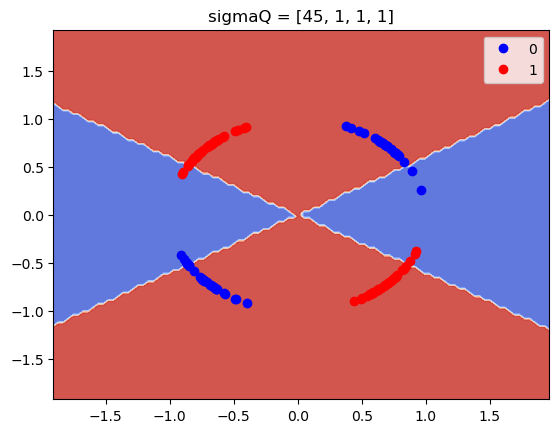

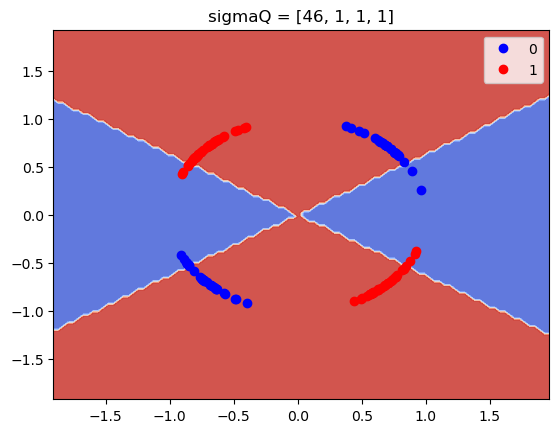

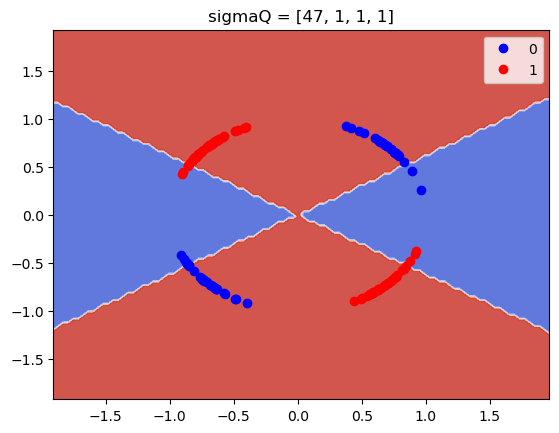

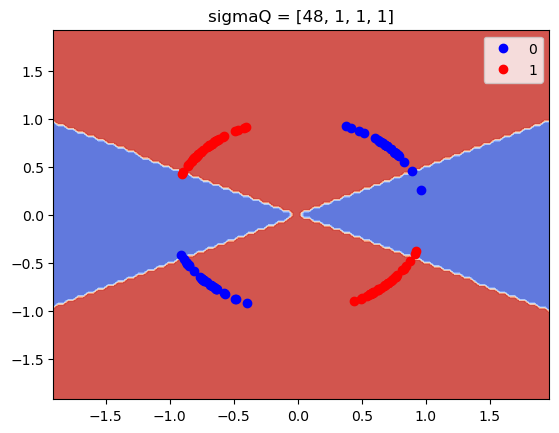

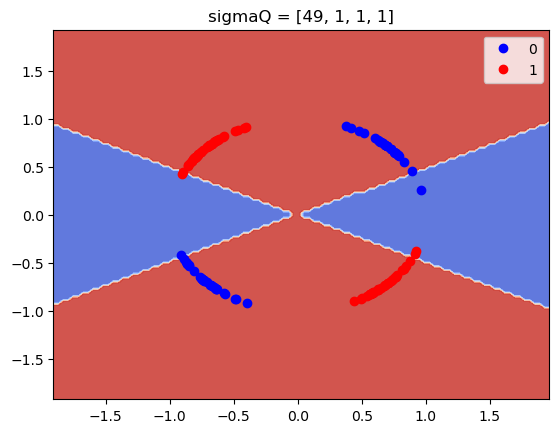

CPU times: total: 1min 9s
Wall time: 1h 17min 42s


In [6]:
%%time
for i in sigmaq_range:
    dic_classifier_params["sigma_q_params"] = [i, 1, 1, 1]
    clf = OneVsRestClassifier(IQCClassifier(
                        classifier_function=classifier_function, 
                        dic_classifier_params=dic_classifier_params,
                        dic_training_params=dic_training_params),
                        n_jobs=-1).fit(normalized_X_train, y_train)
    title = "sigmaQ = " + str(dic_classifier_params["sigma_q_params"])
    path = "results/xor/SigmaX=" + str(i) + "; Others=[1,1,1].png"
    decision_visualization(clf = clf, X = normalized_X_test, y = y_test, title = title, saveFigPath = path)

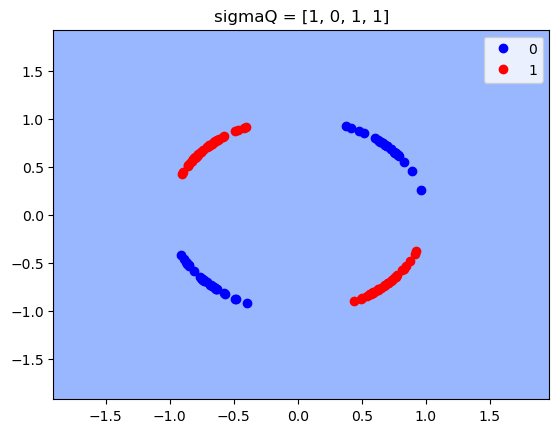

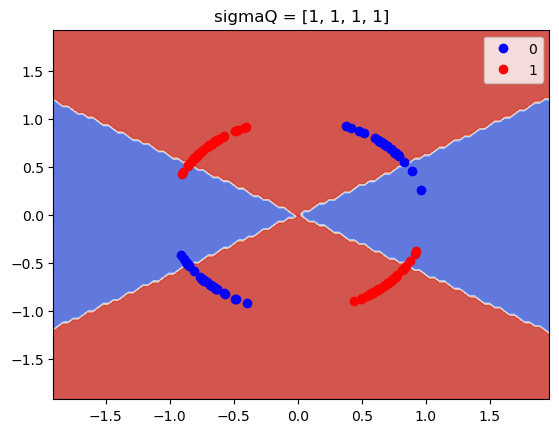

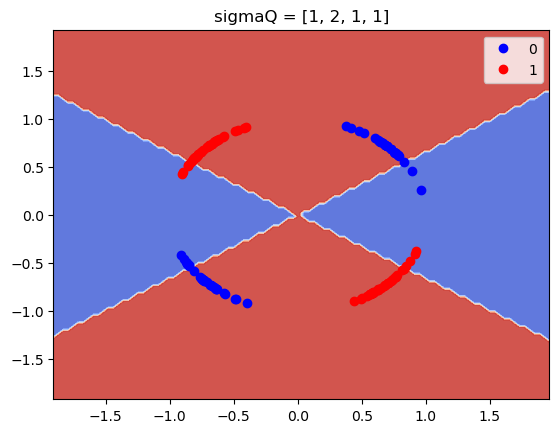

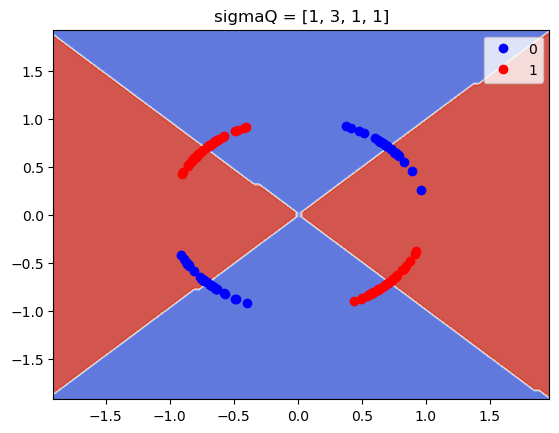

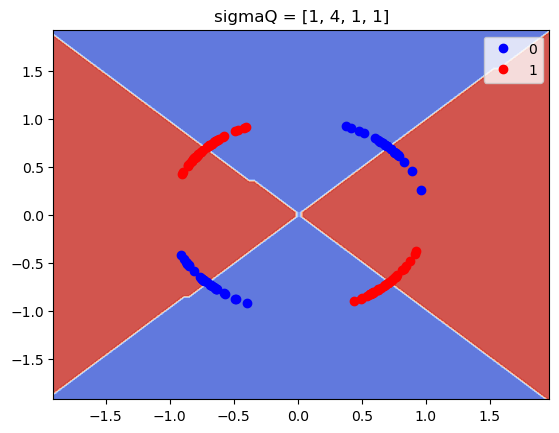

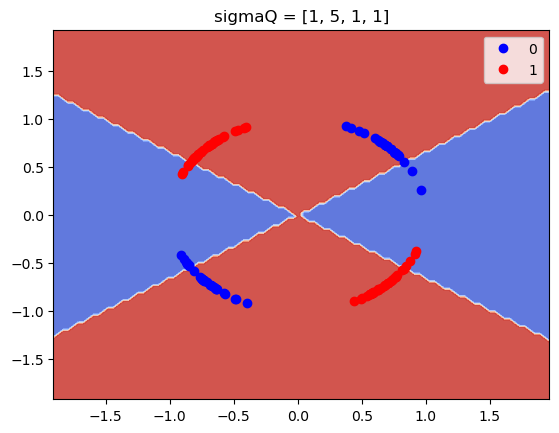

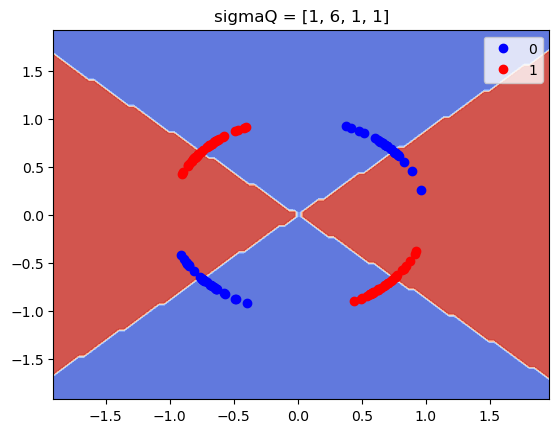

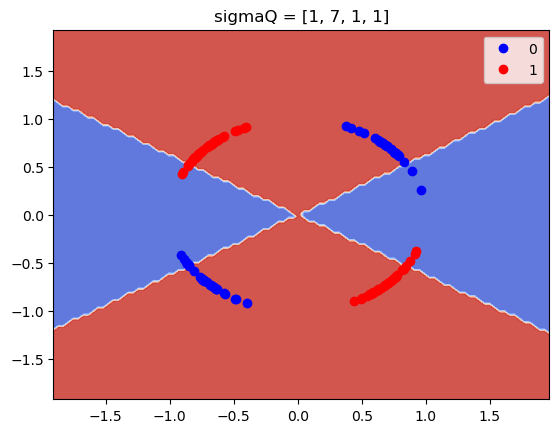

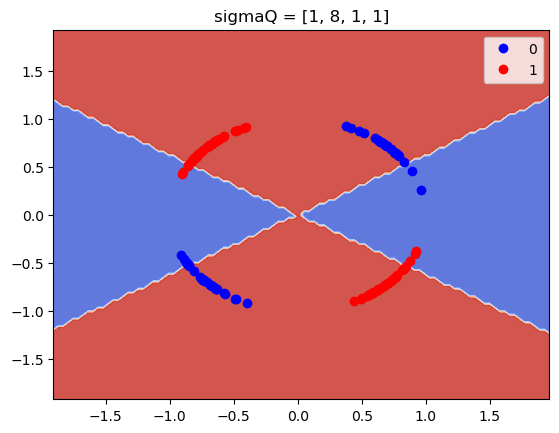

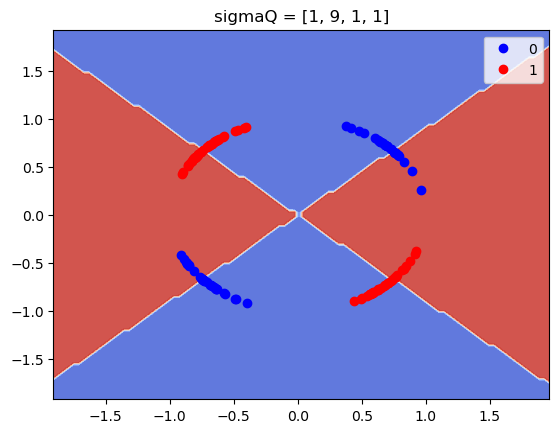

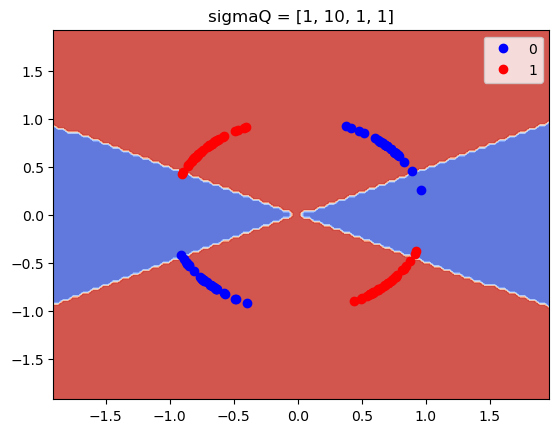

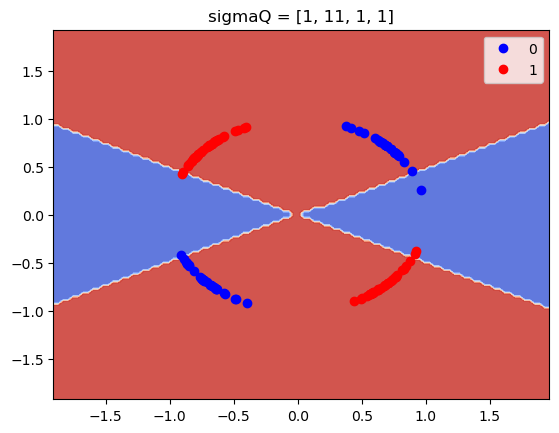

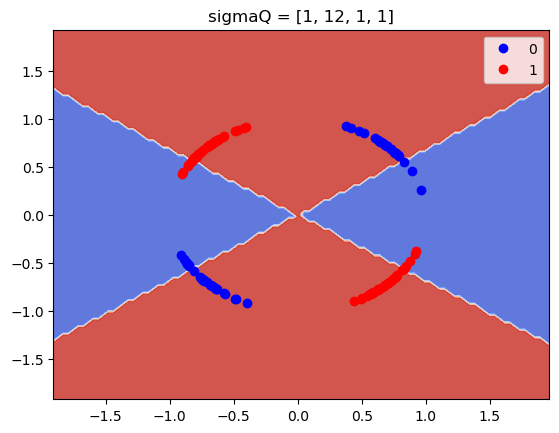

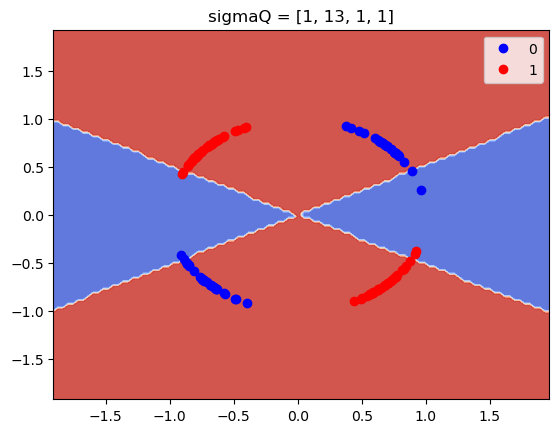

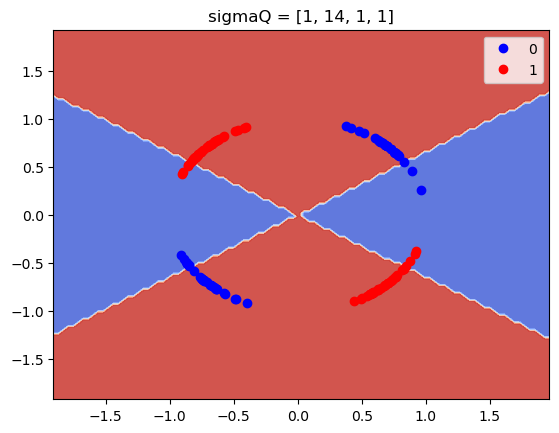

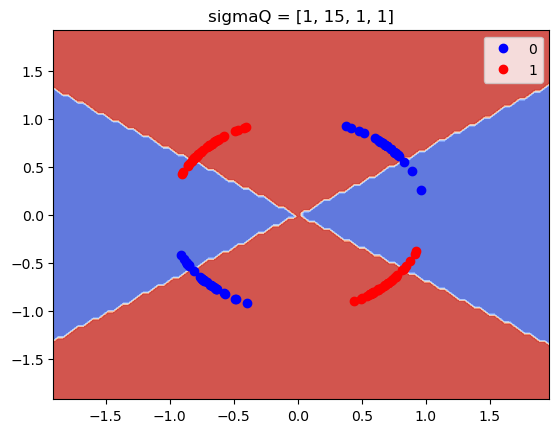

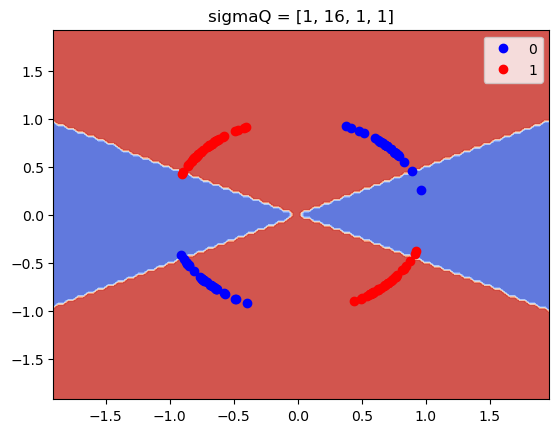

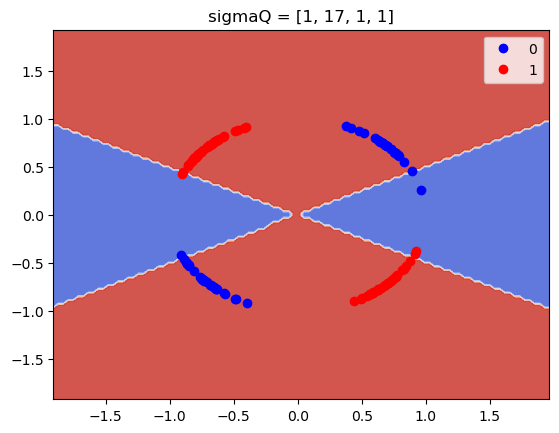

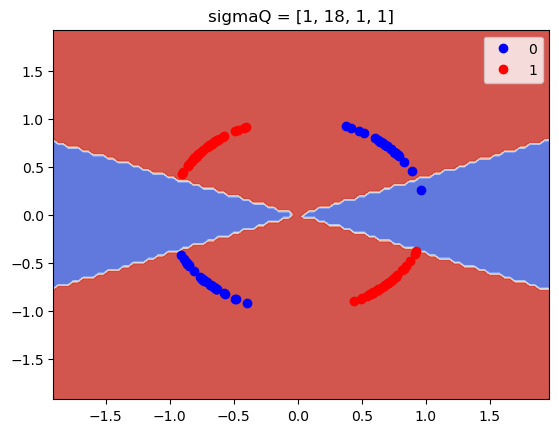

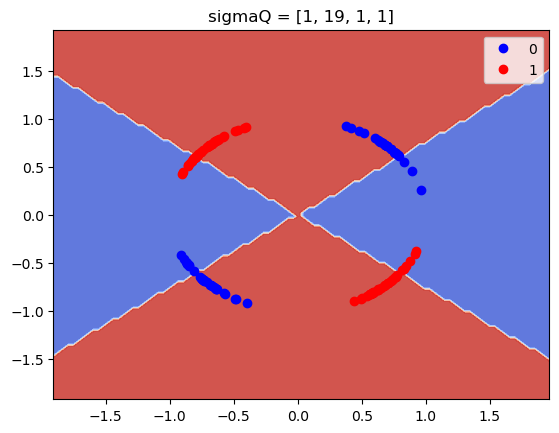

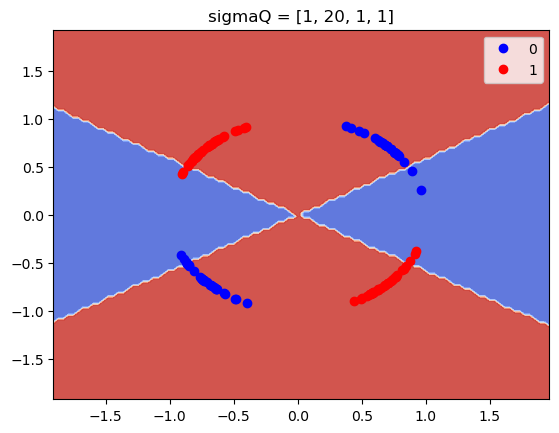

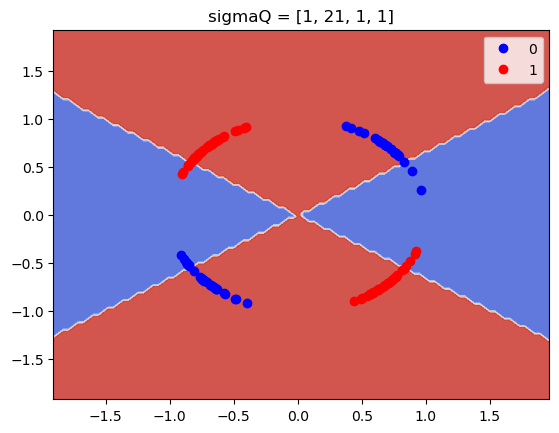

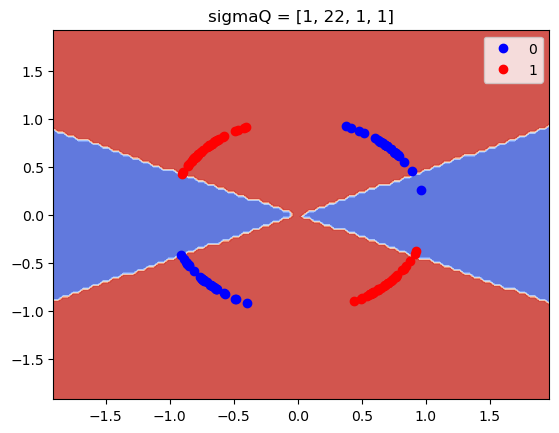

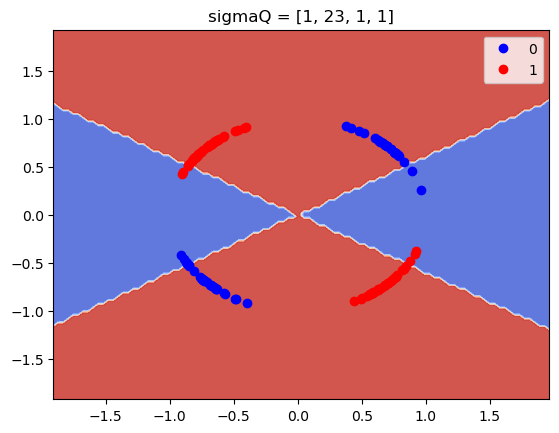

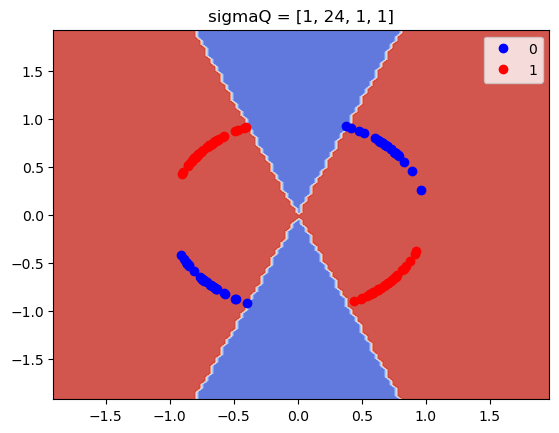

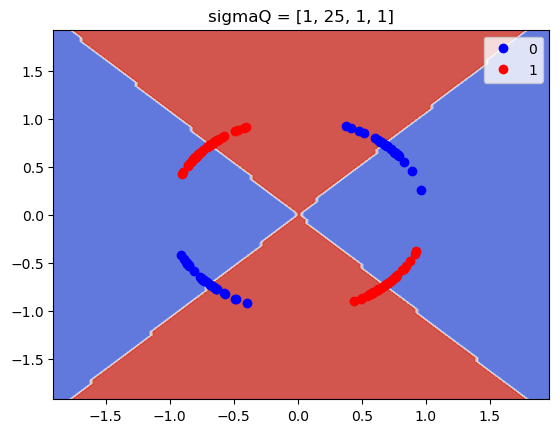

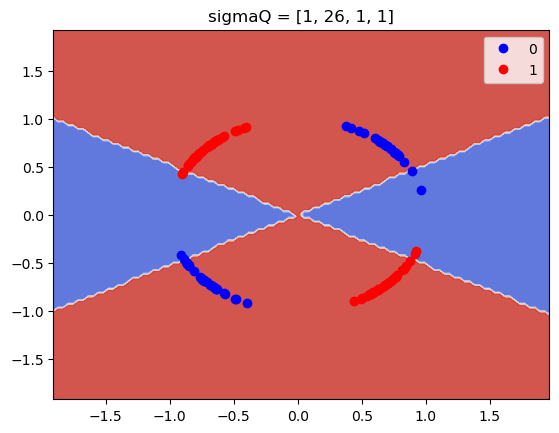

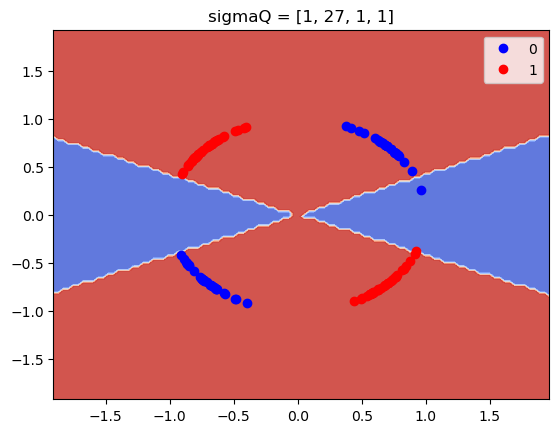

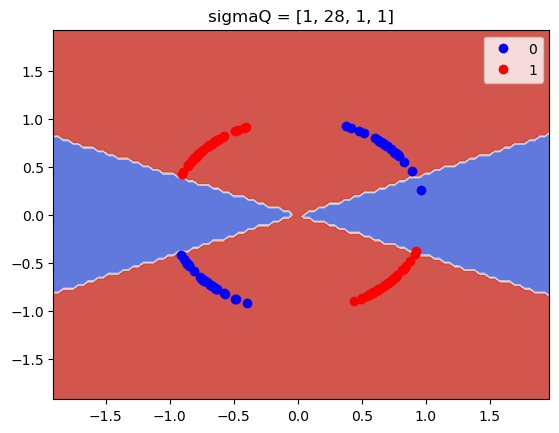

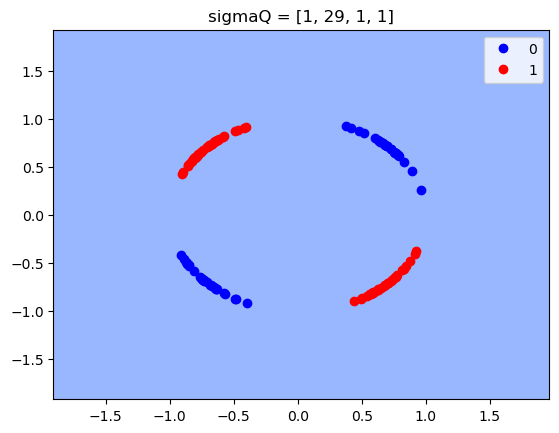

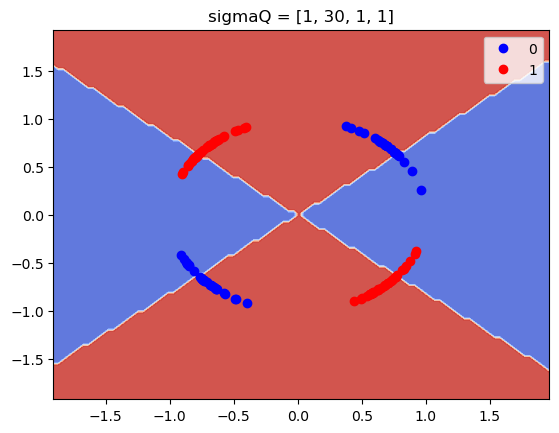

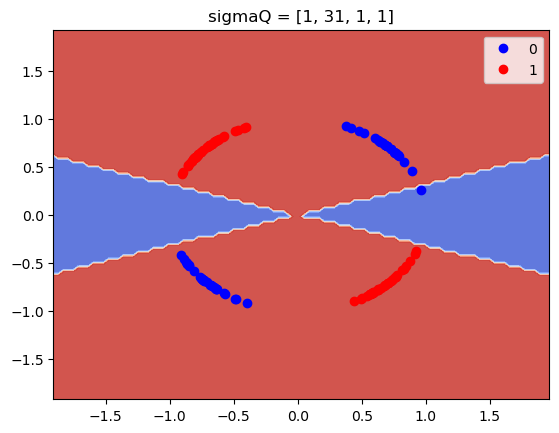

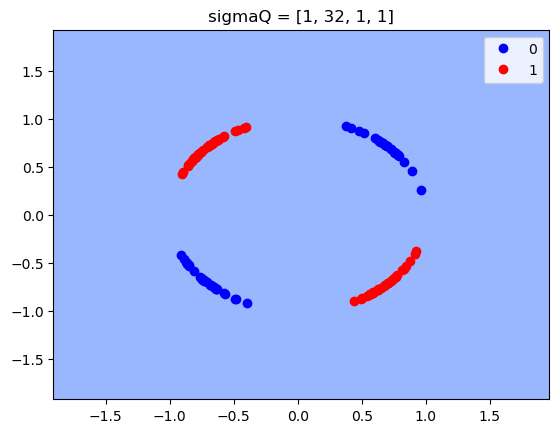

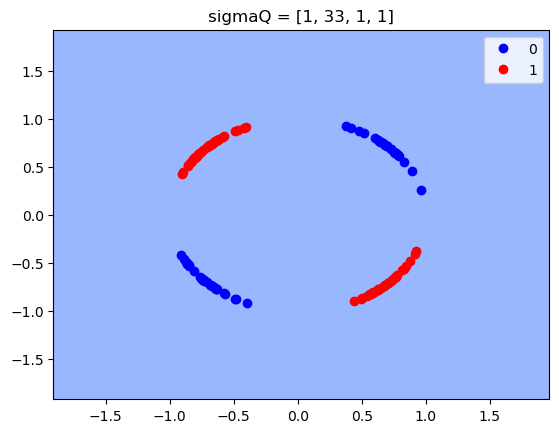

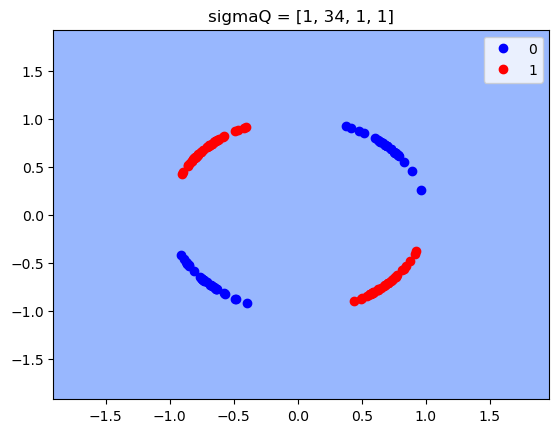

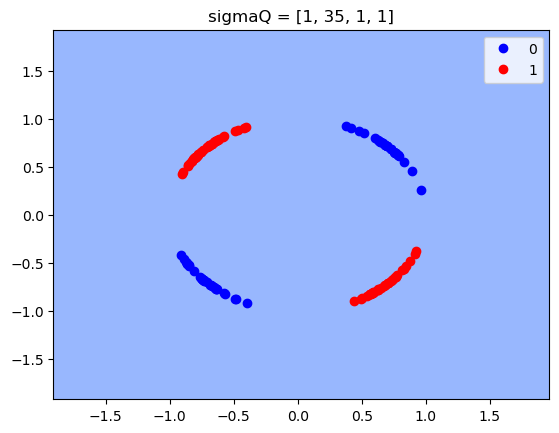

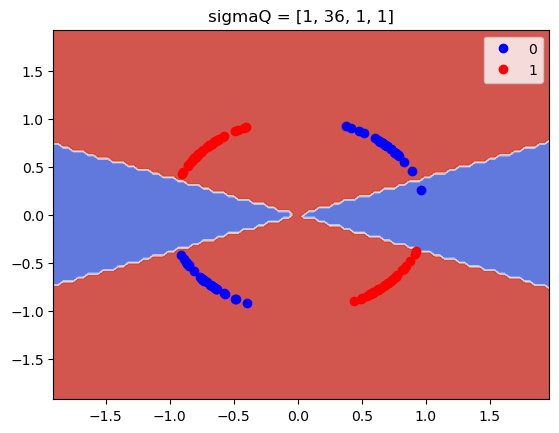

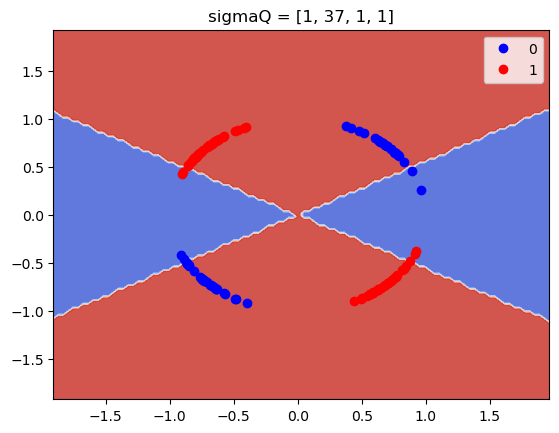

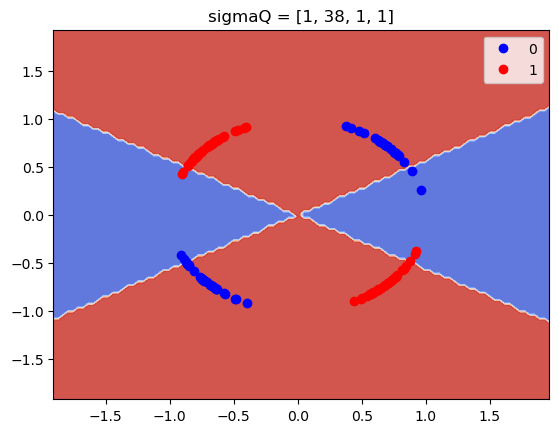

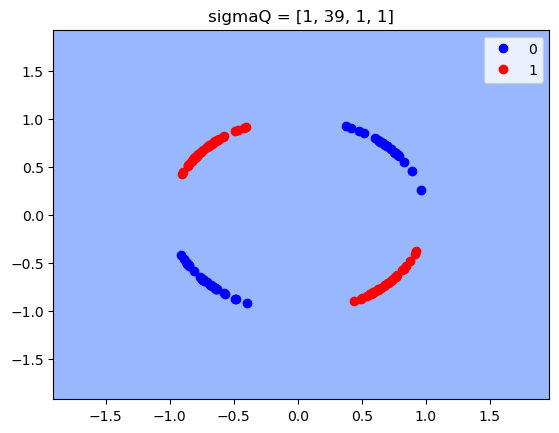

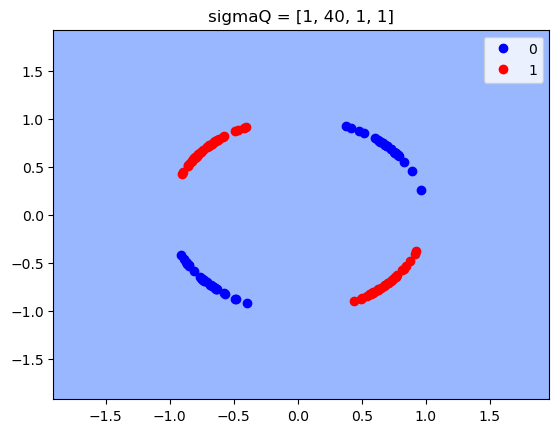

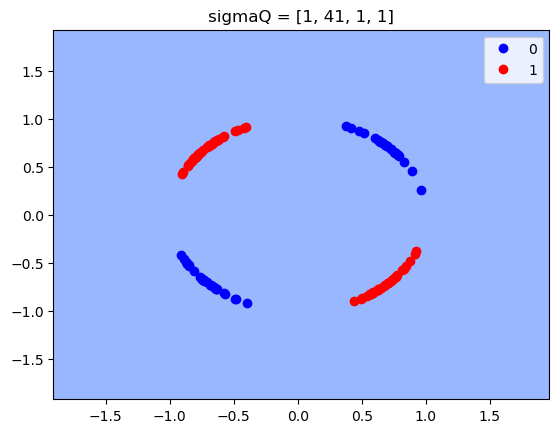

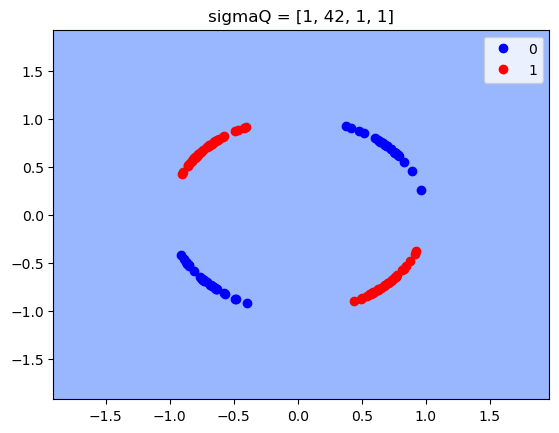

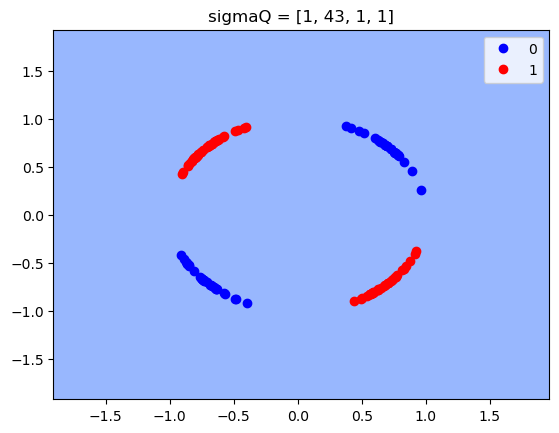

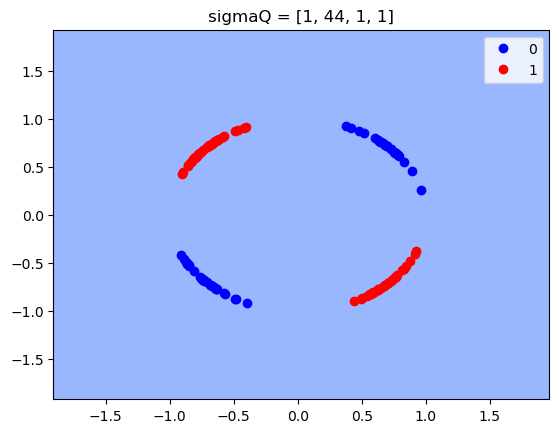

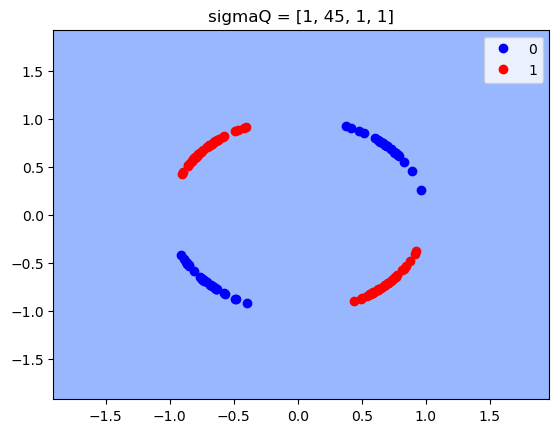

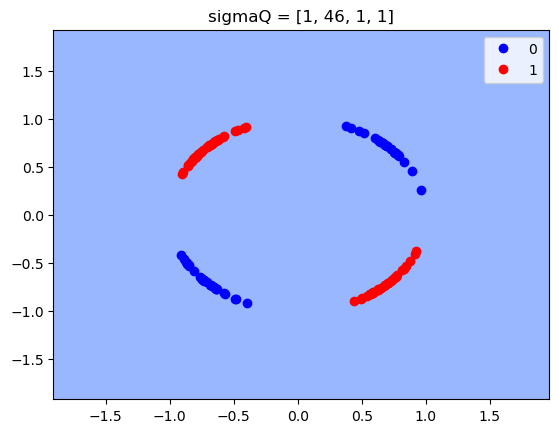

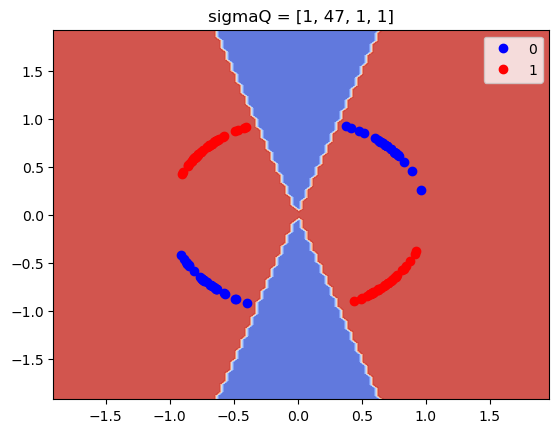

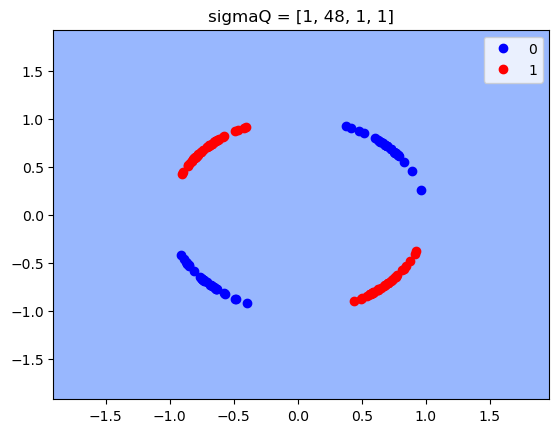

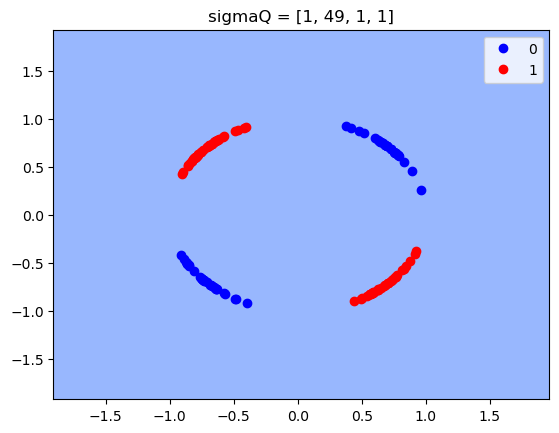

CPU times: total: 1min 8s
Wall time: 1h 15min 3s


In [7]:
%%time
for i in sigmaq_range:
    dic_classifier_params["sigma_q_params"] = [1, i, 1, 1]
    clf = OneVsRestClassifier(IQCClassifier(
                        classifier_function=classifier_function, 
                        dic_classifier_params=dic_classifier_params,
                        dic_training_params=dic_training_params),
                        n_jobs=-1).fit(normalized_X_train, y_train)
    title = "sigmaQ = " + str(dic_classifier_params["sigma_q_params"])
    path = "results/xor/SigmaY=" + str(i) + "; Others=[1,1,1].png"
    decision_visualization(clf = clf, X = normalized_X_test, y = y_test, title = title, saveFigPath = path)

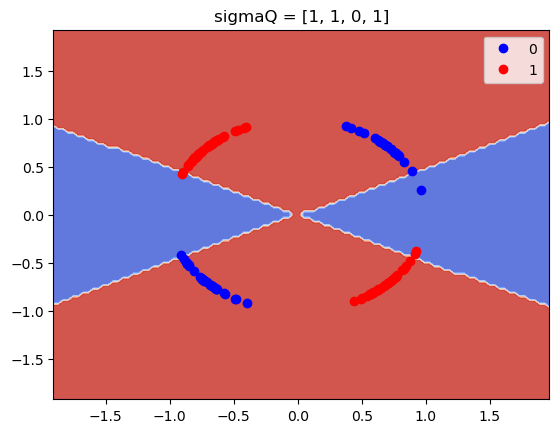

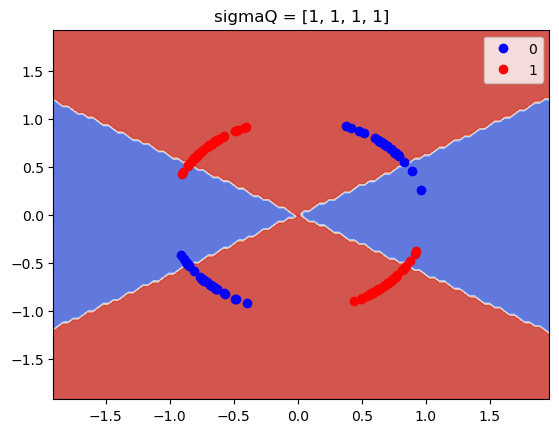

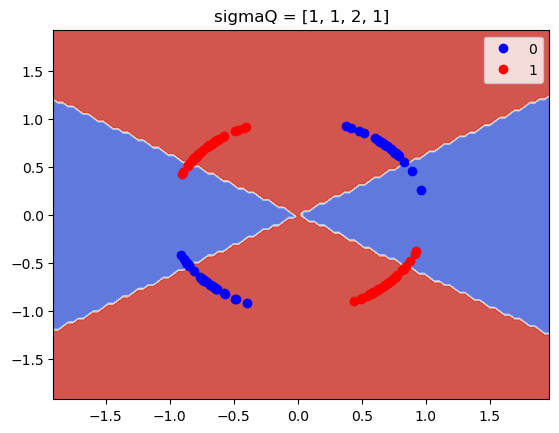

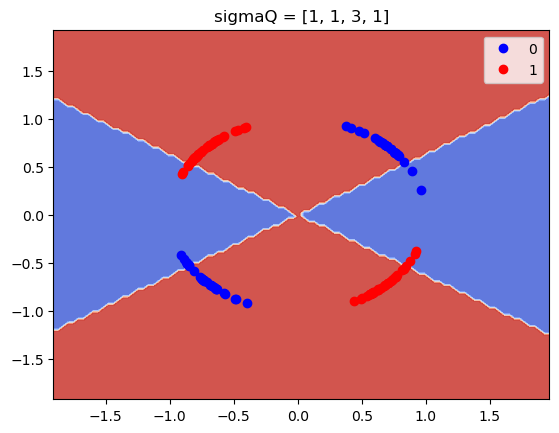

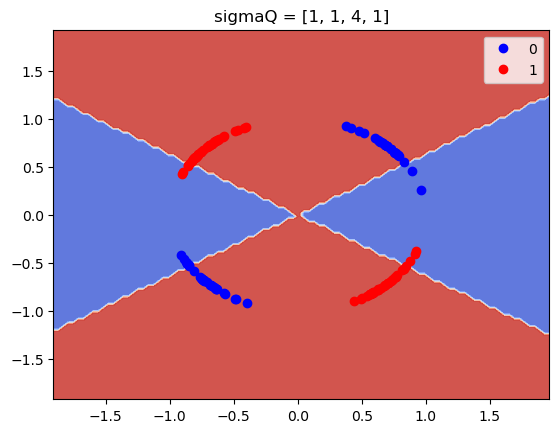

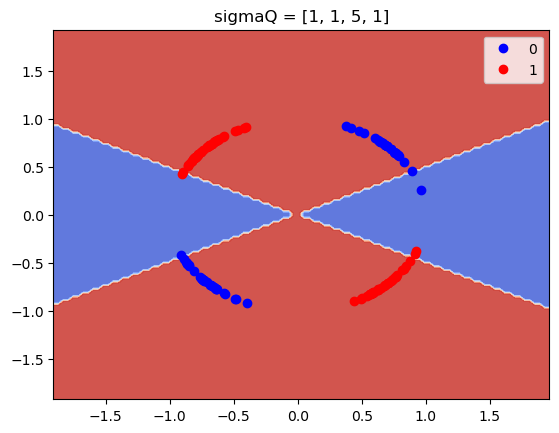

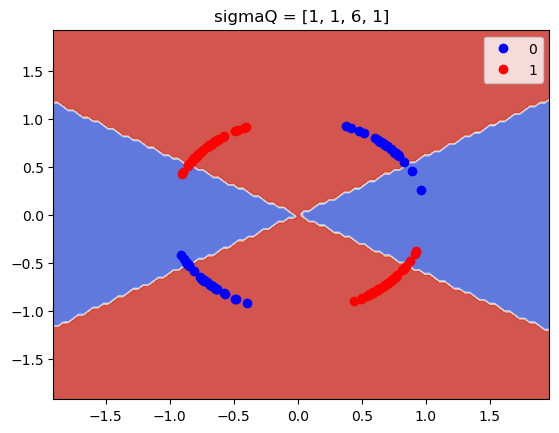

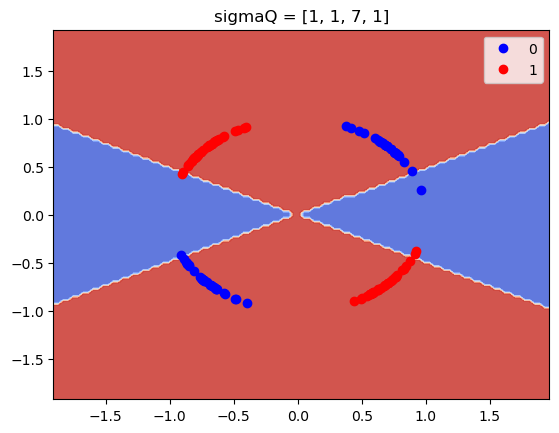

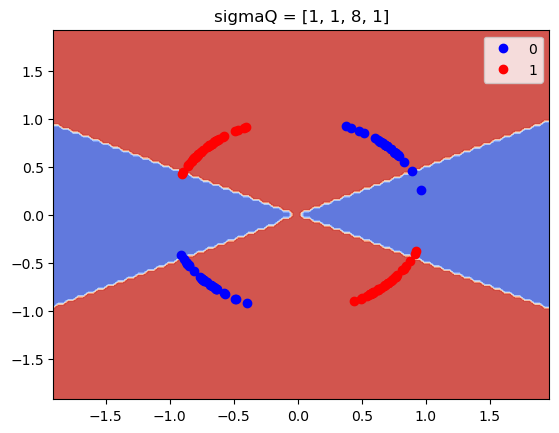

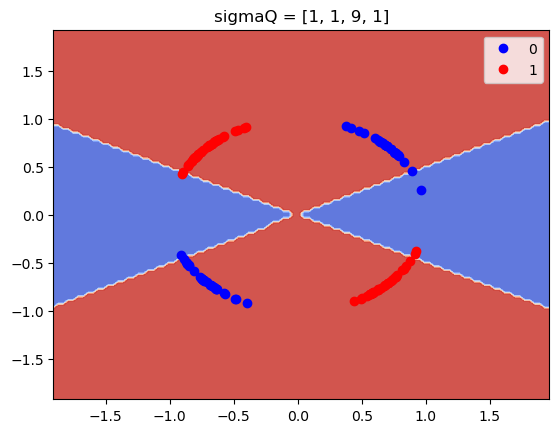

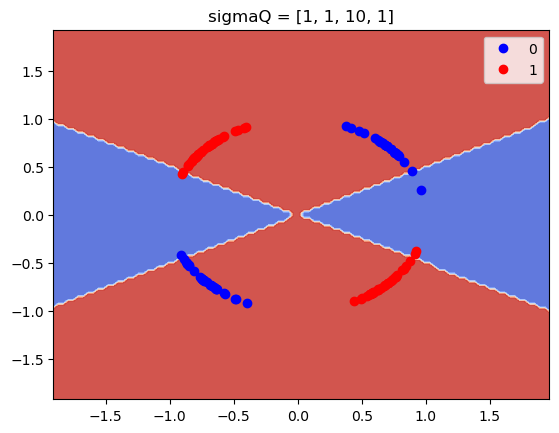

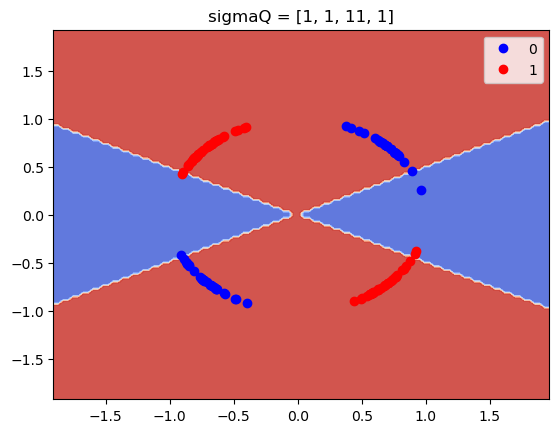

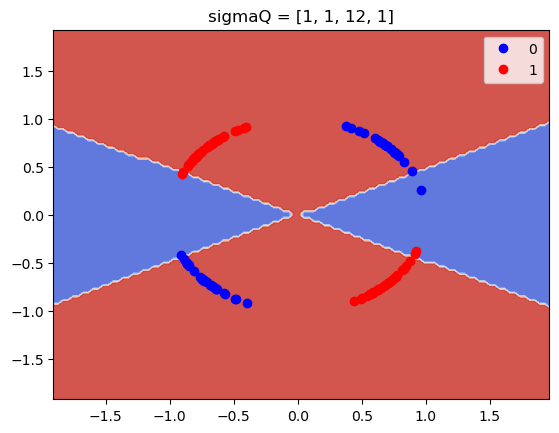

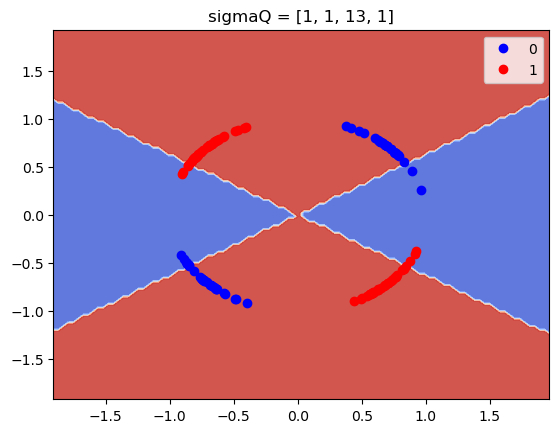

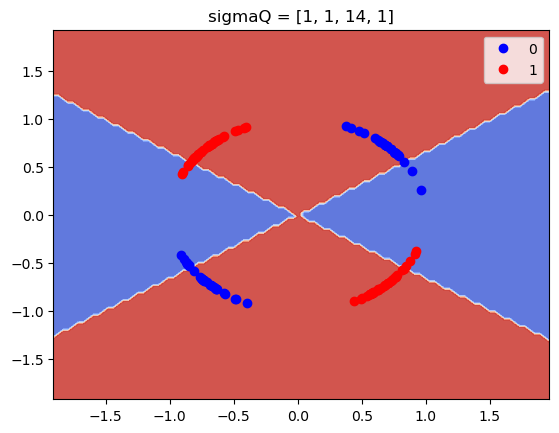

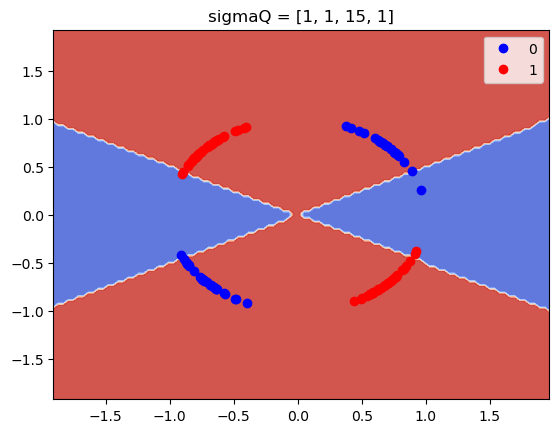

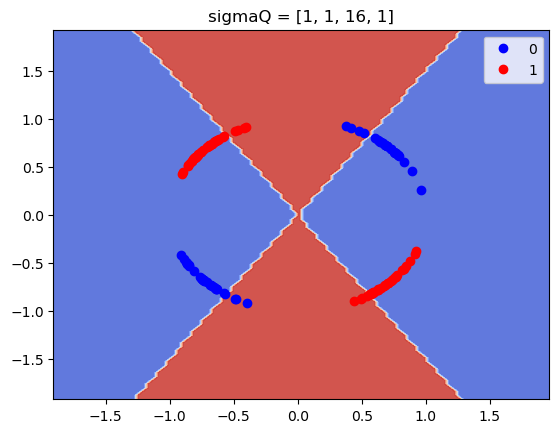

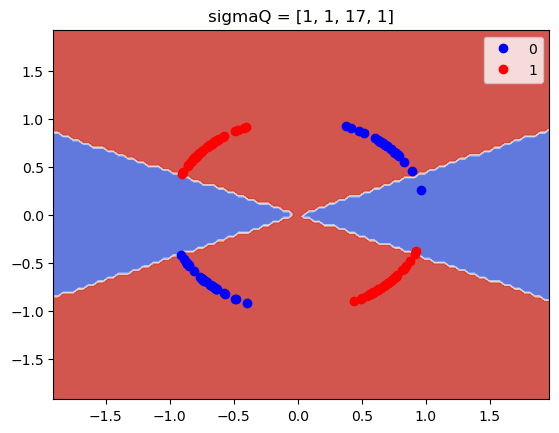

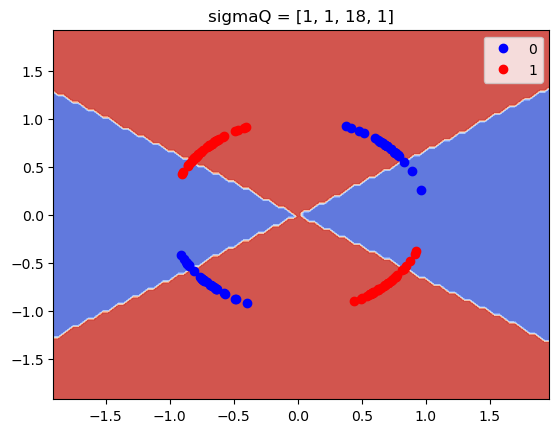

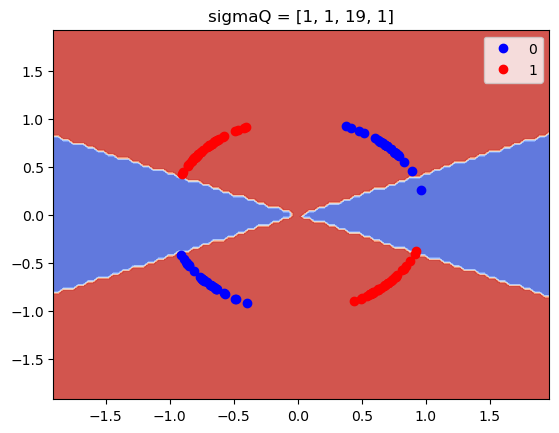

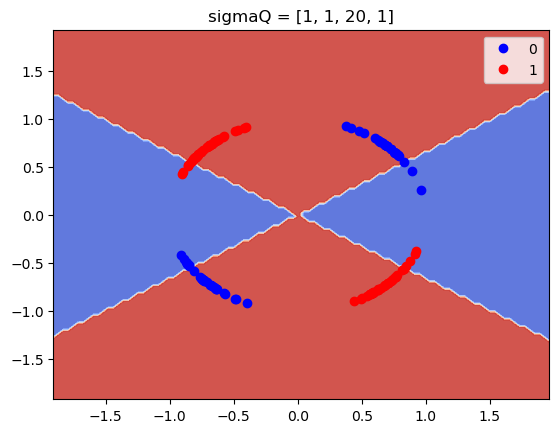

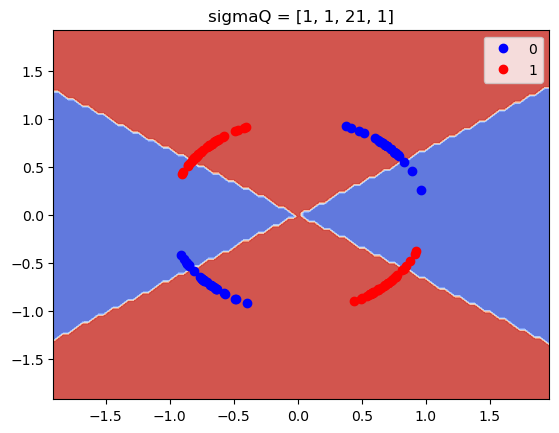

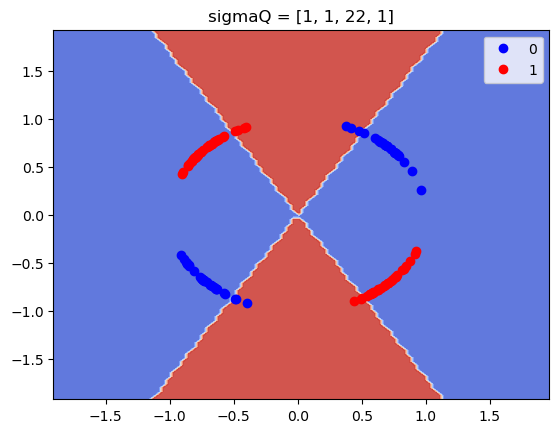

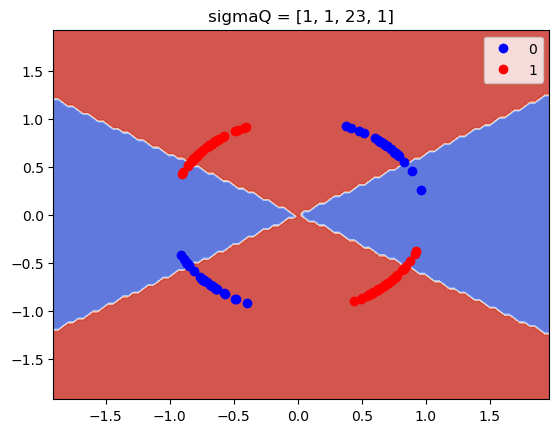

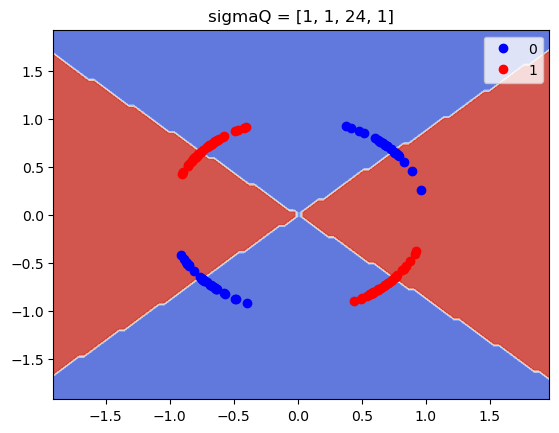

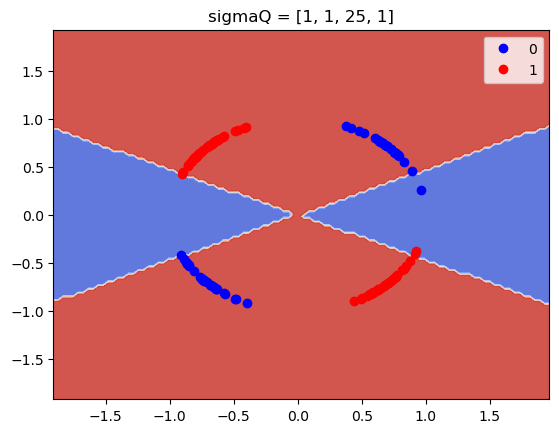

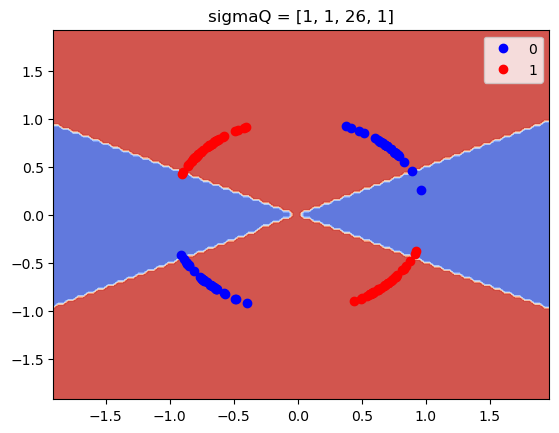

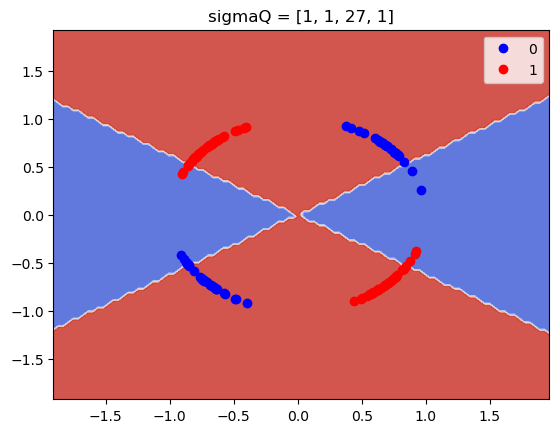

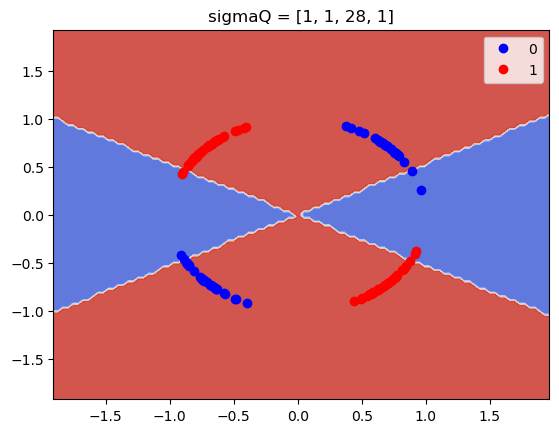

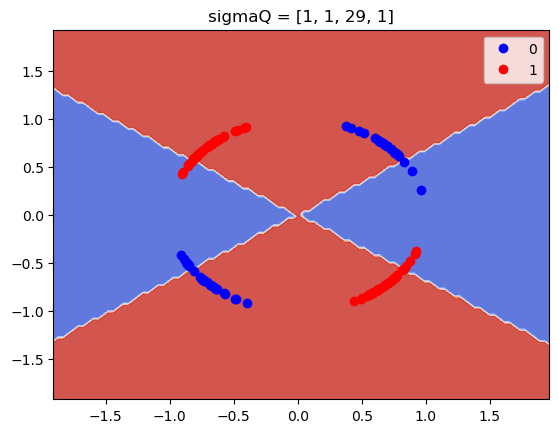

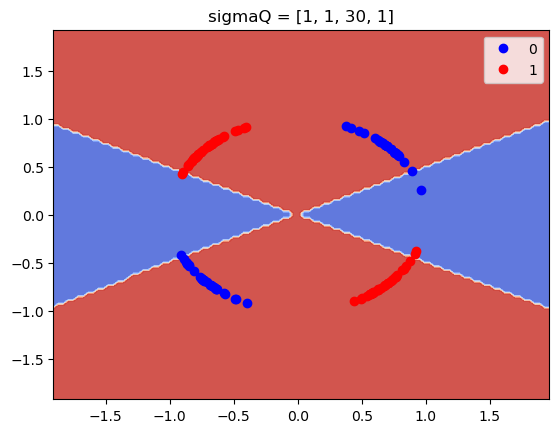

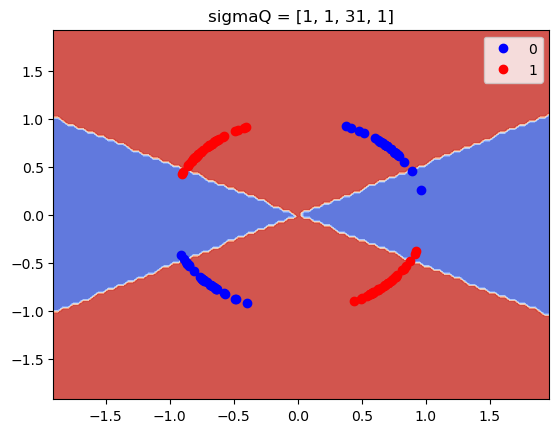

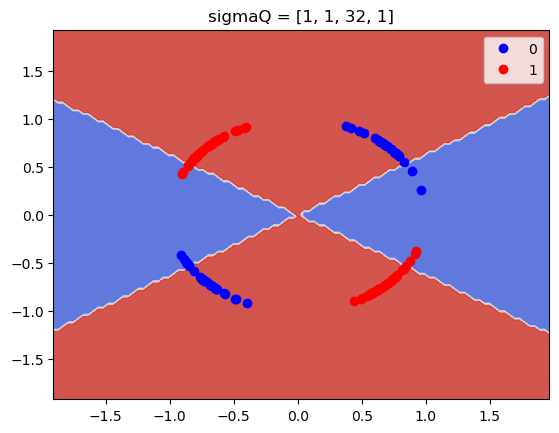

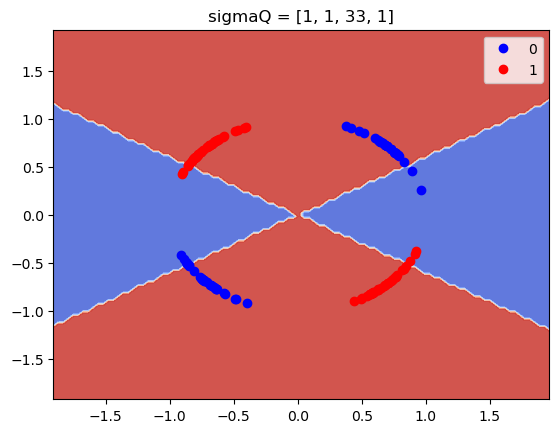

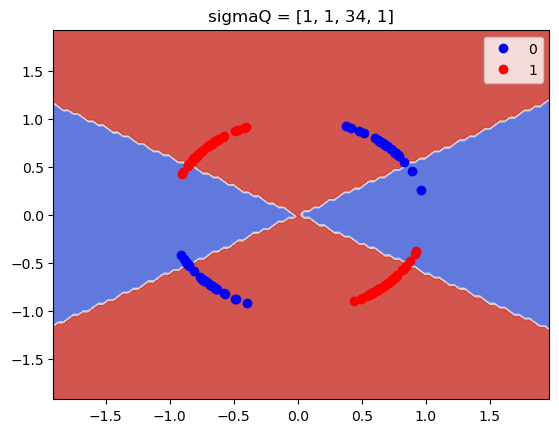

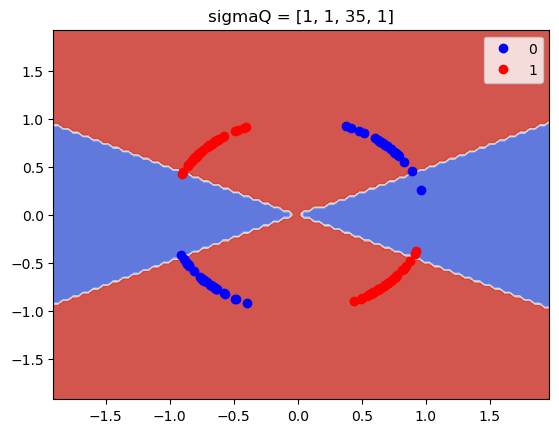

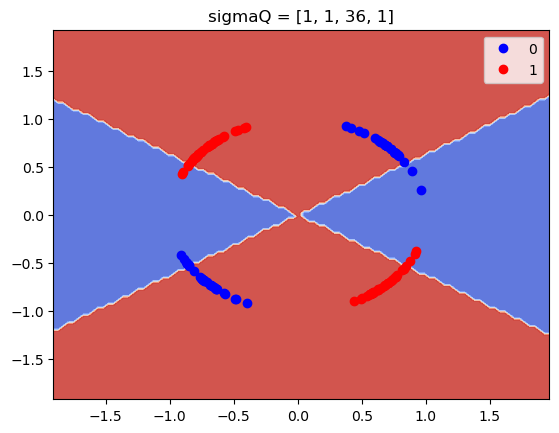

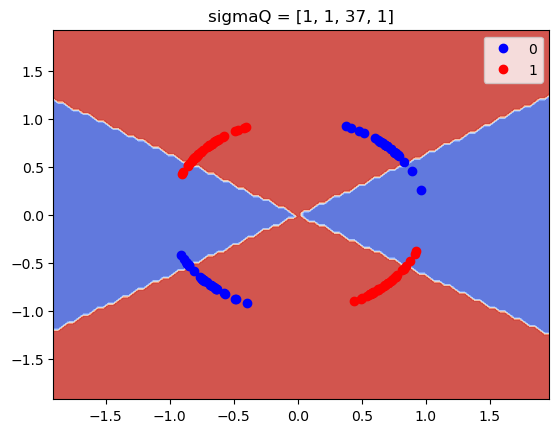

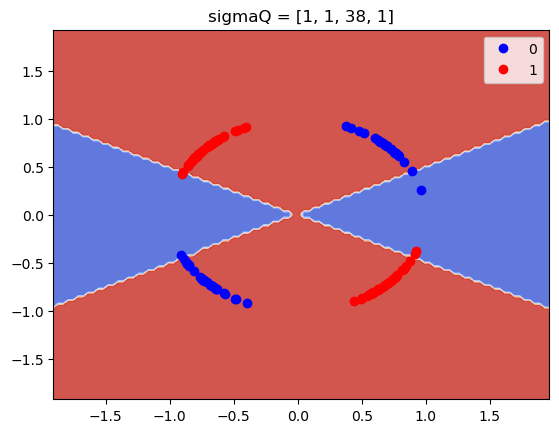

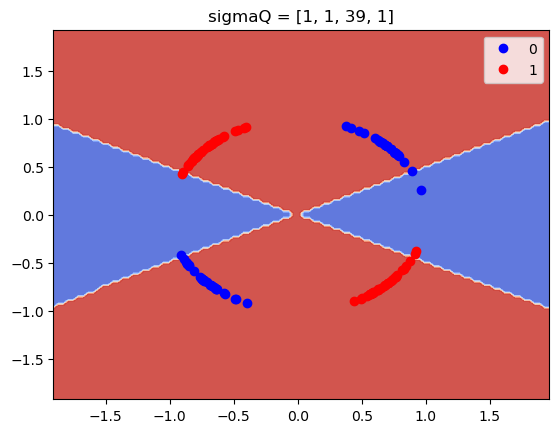

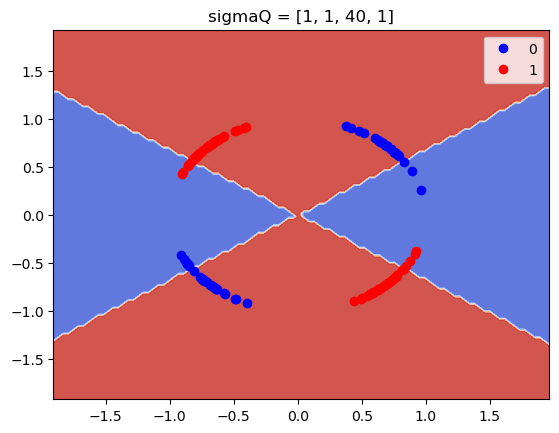

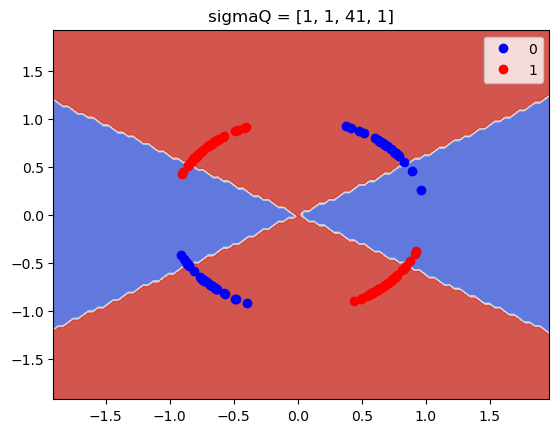

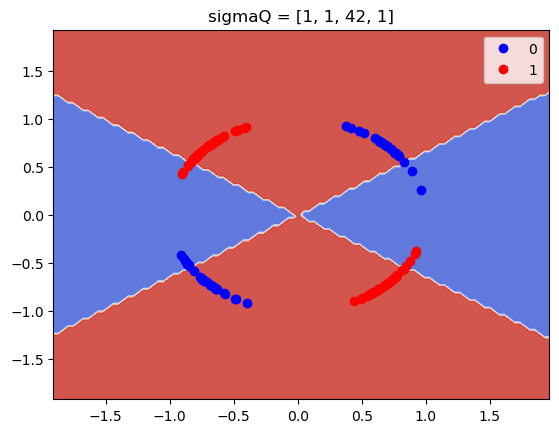

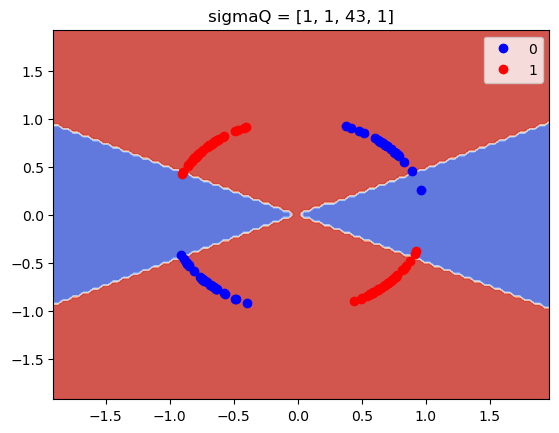

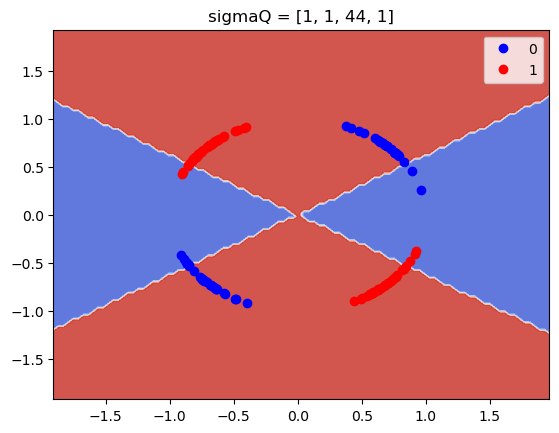

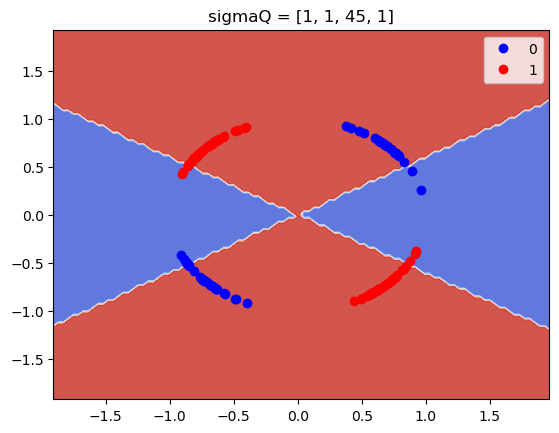

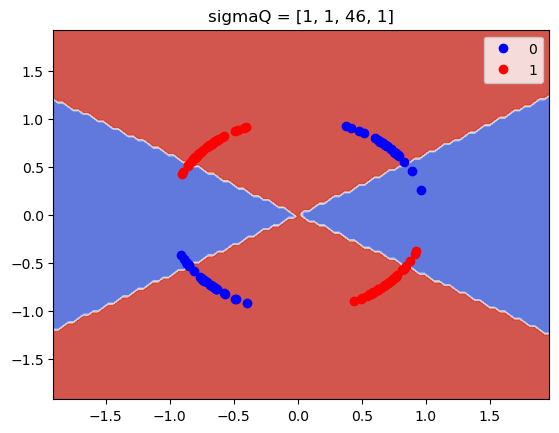

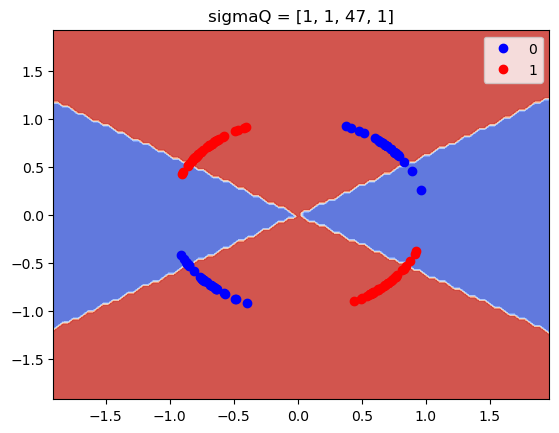

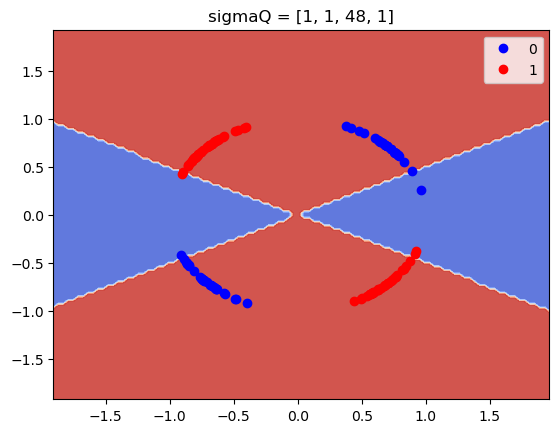

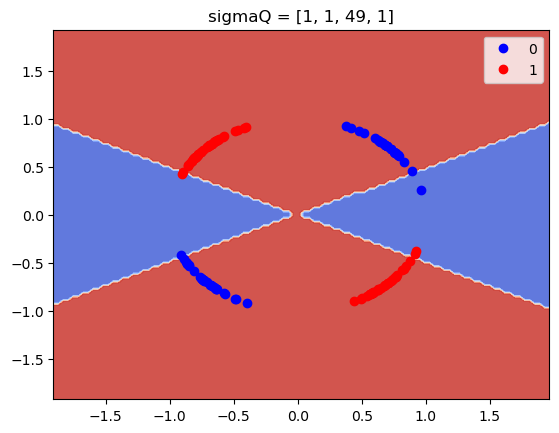

CPU times: total: 1min 10s
Wall time: 1h 17min 20s


In [8]:
%%time
for i in sigmaq_range:
    dic_classifier_params["sigma_q_params"] = [1, 1, i, 1]
    clf = OneVsRestClassifier(IQCClassifier(
                        classifier_function=classifier_function, 
                        dic_classifier_params=dic_classifier_params,
                        dic_training_params=dic_training_params),
                        n_jobs=-1).fit(normalized_X_train, y_train)
    title = "sigmaQ = " + str(dic_classifier_params["sigma_q_params"])
    path = "results/xor/SigmaZ=" + str(i) + "; Others=[1,1,1].png"
    decision_visualization(clf = clf, X = normalized_X_test, y = y_test, title = title, saveFigPath = path)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


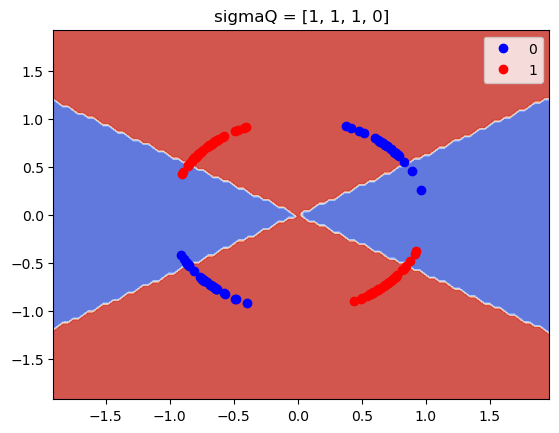

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.4min finished


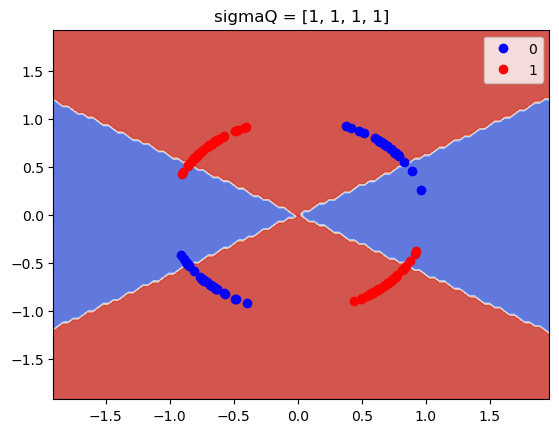

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.4min finished


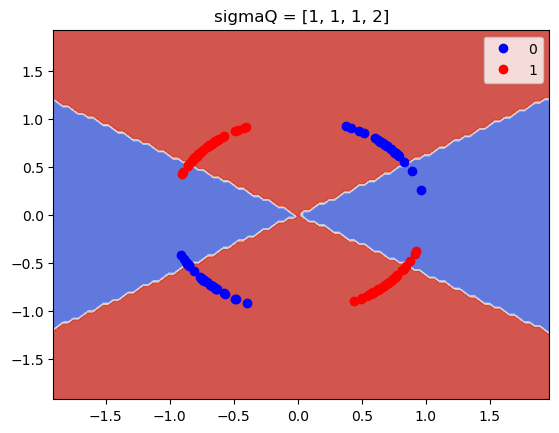

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


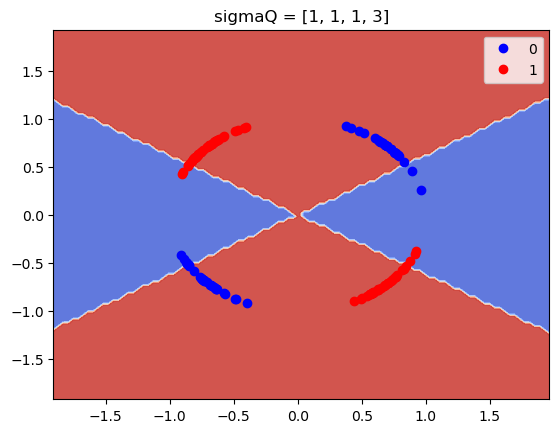

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


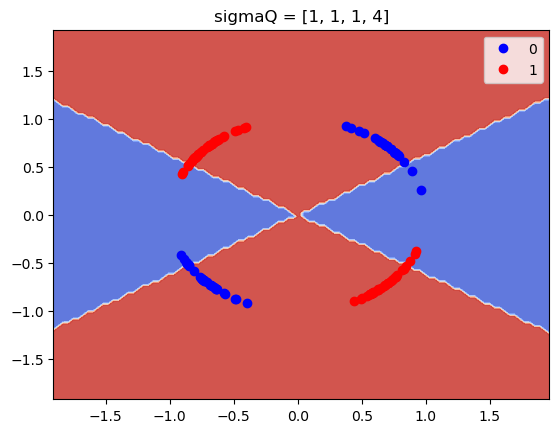

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


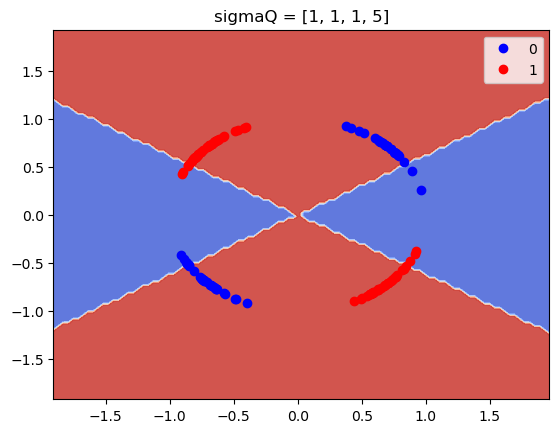

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.4min finished


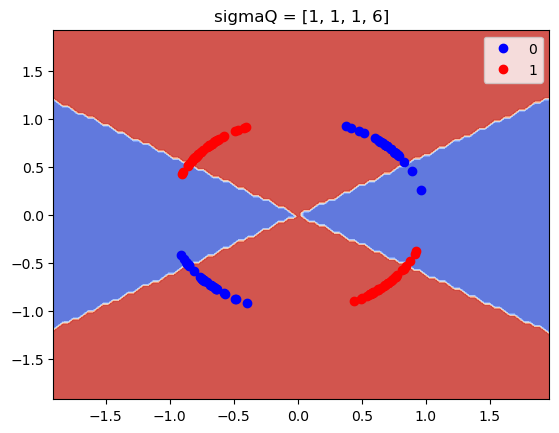

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


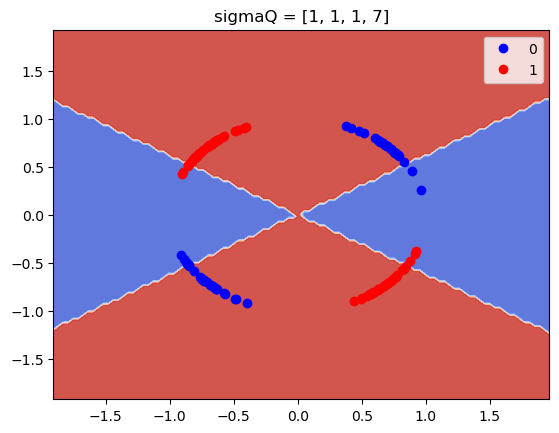

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


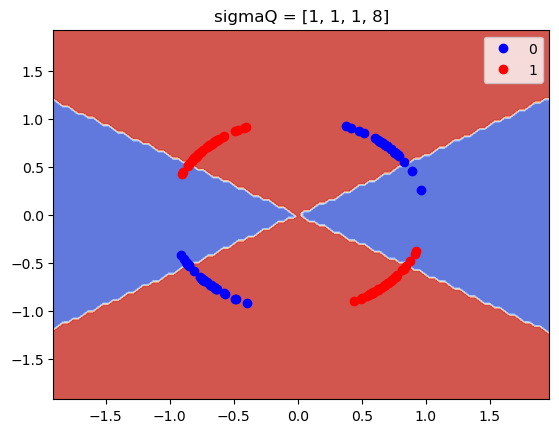

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


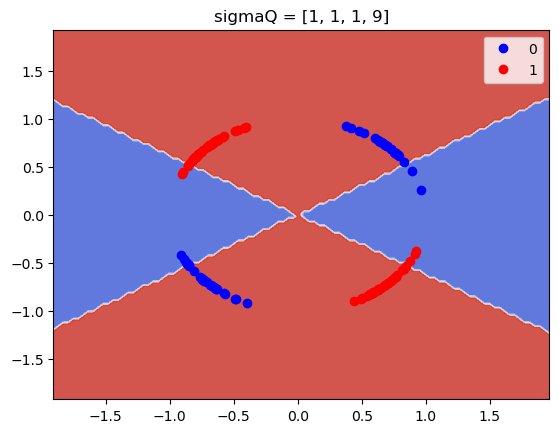

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


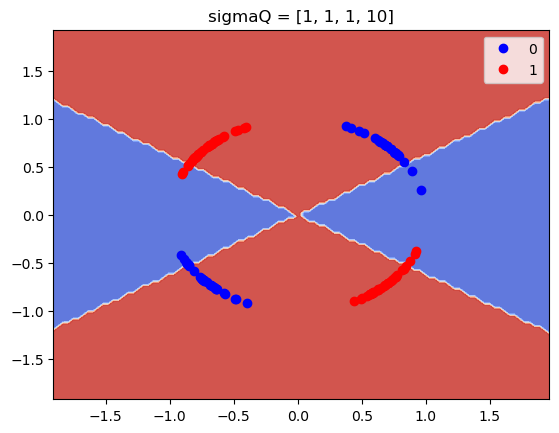

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


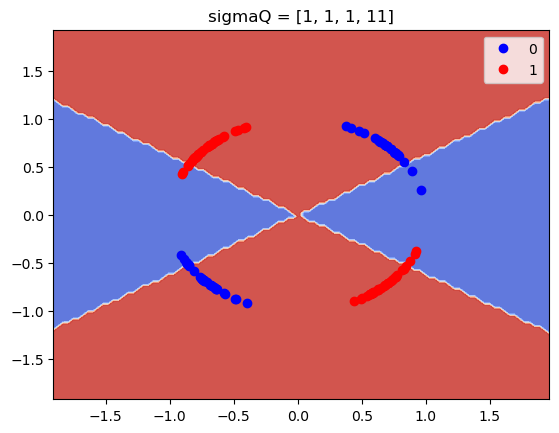

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


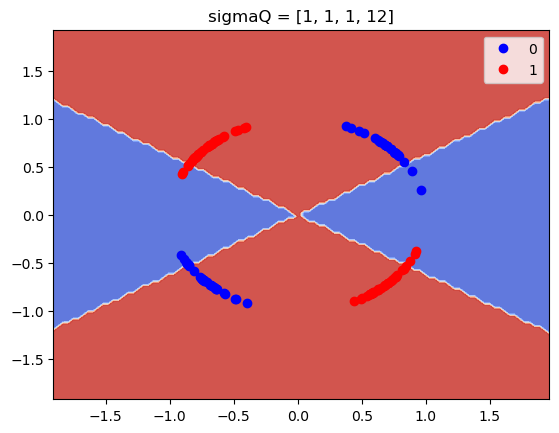

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


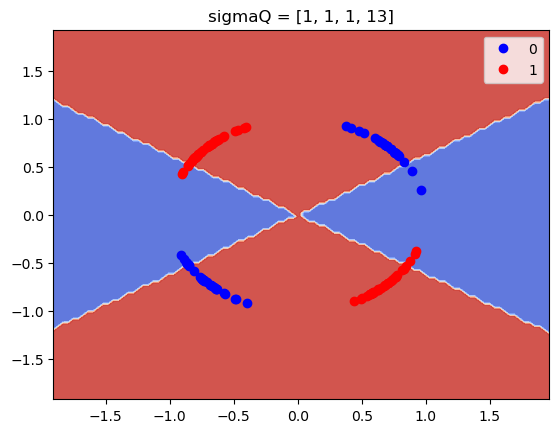

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


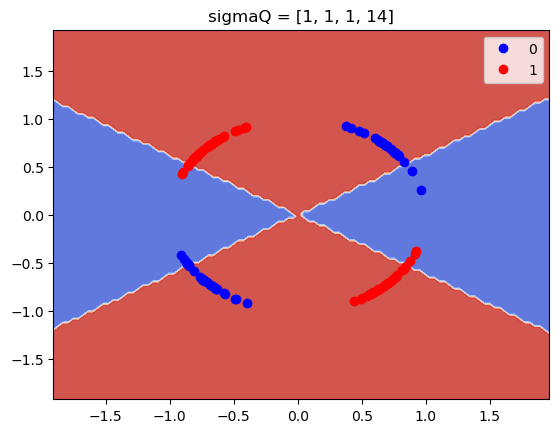

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


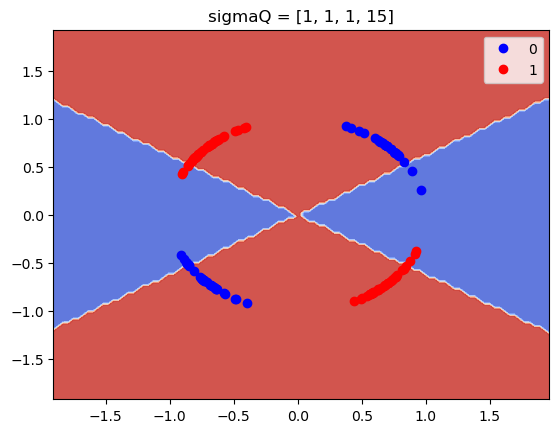

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


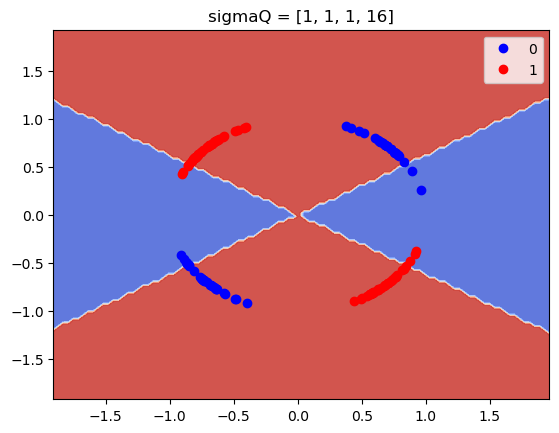

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


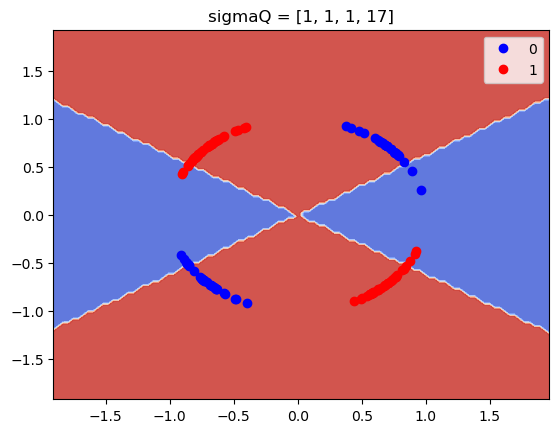

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


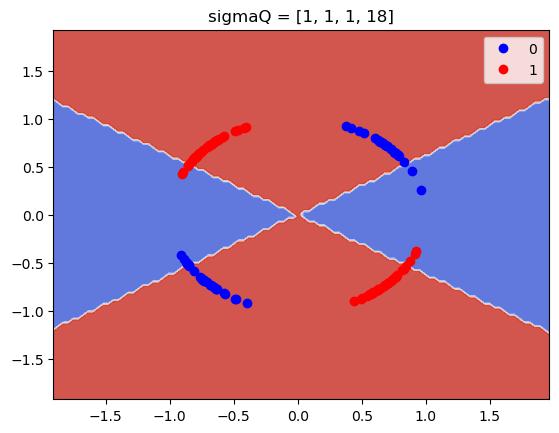

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


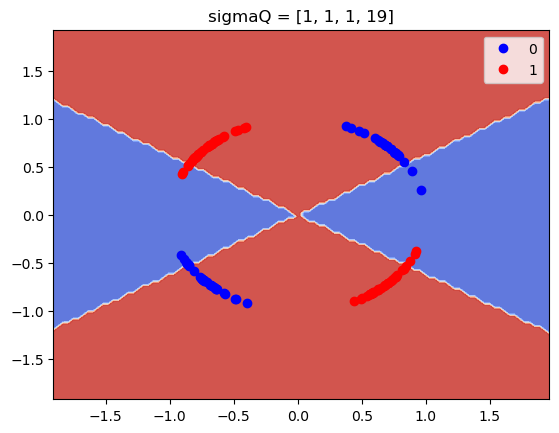

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


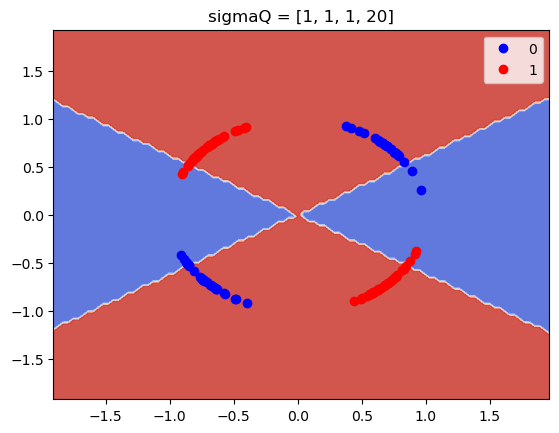

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


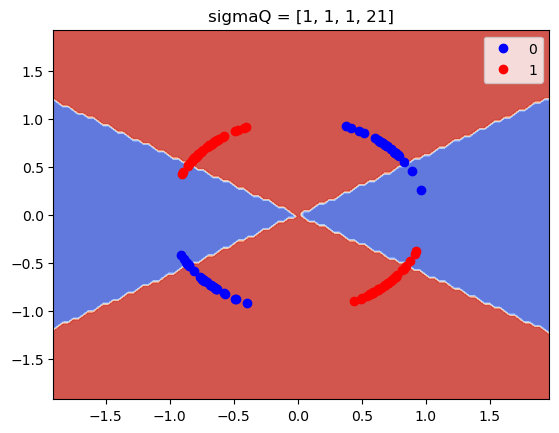

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


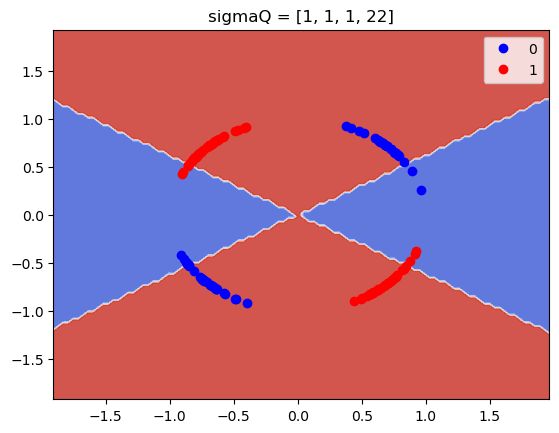

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


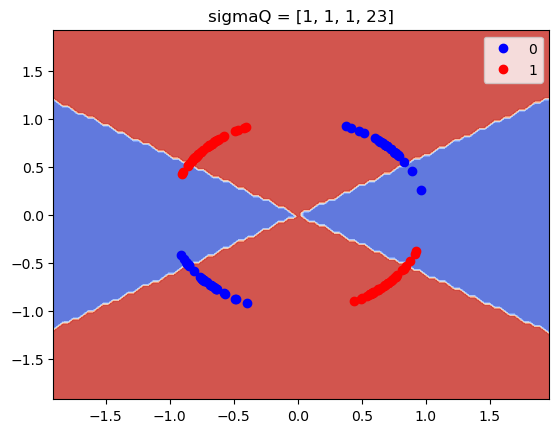

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


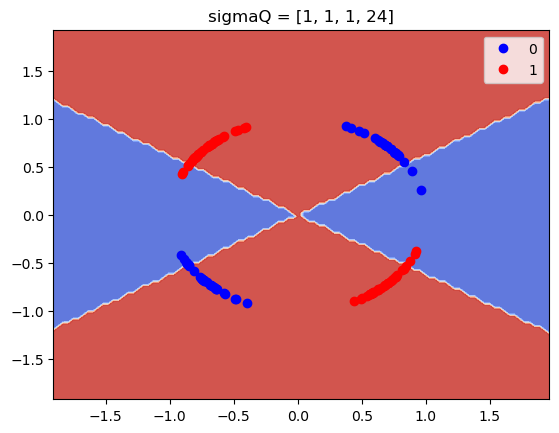

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


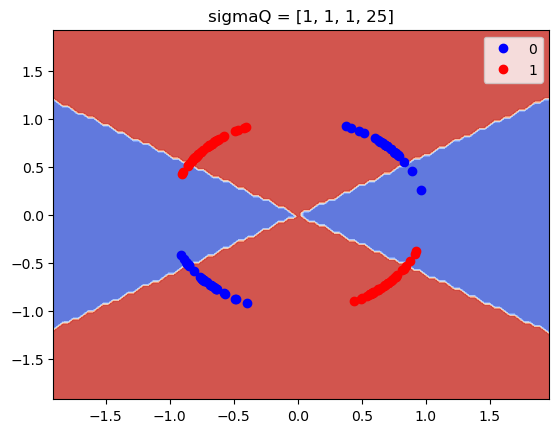

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


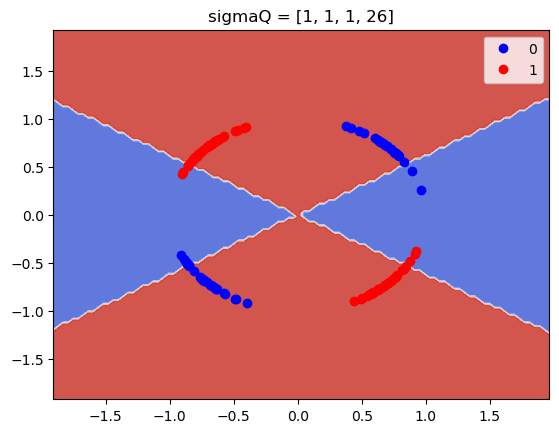

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


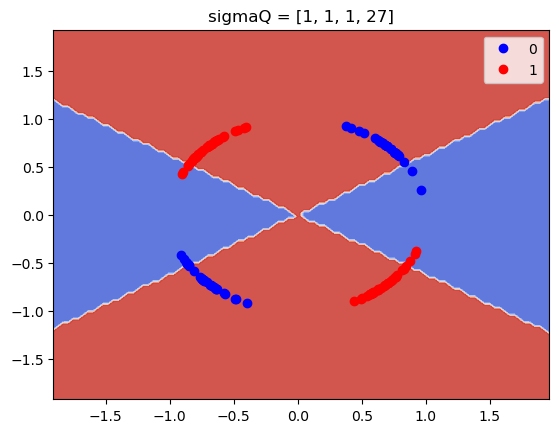

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.6min finished


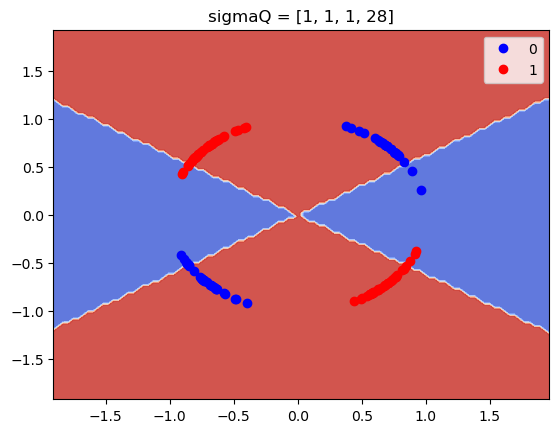

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


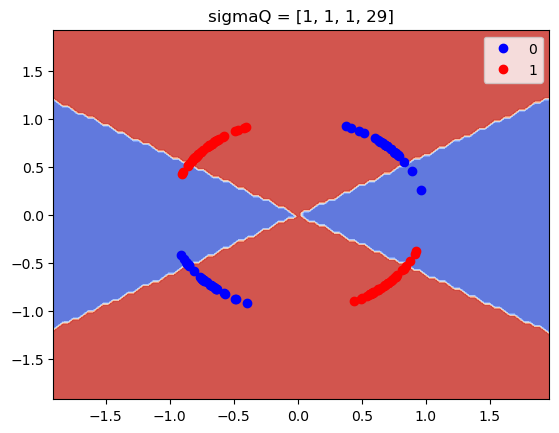

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


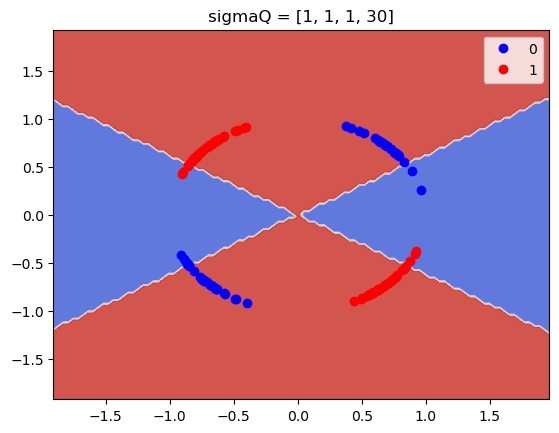

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


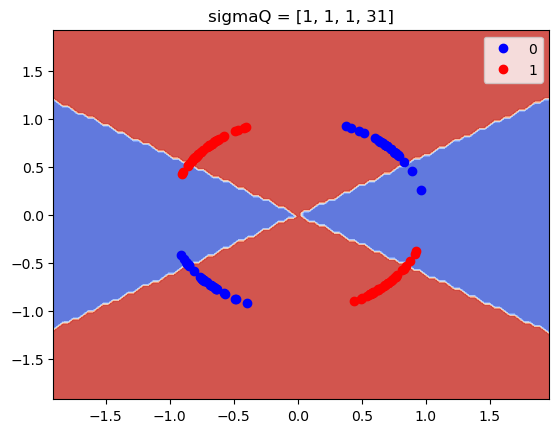

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


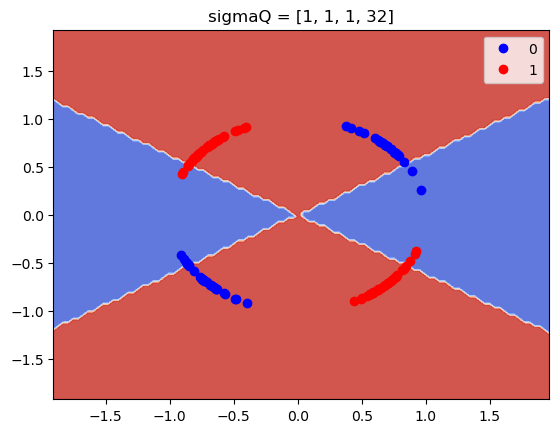

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


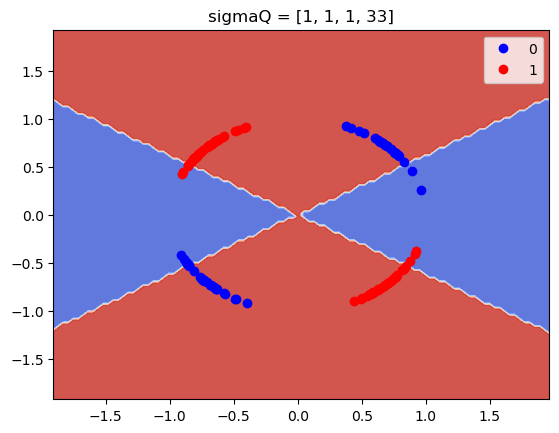

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


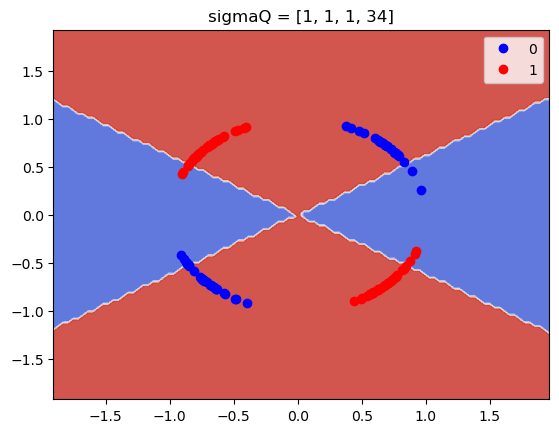

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


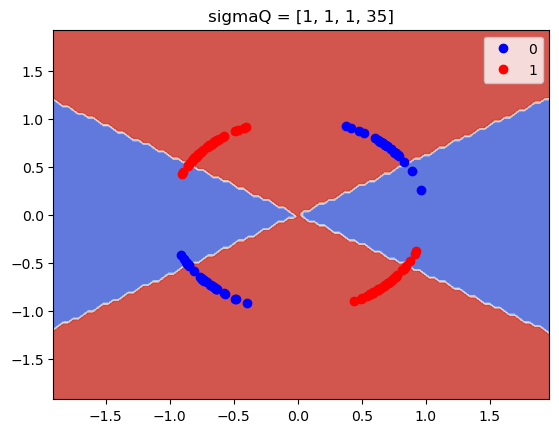

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


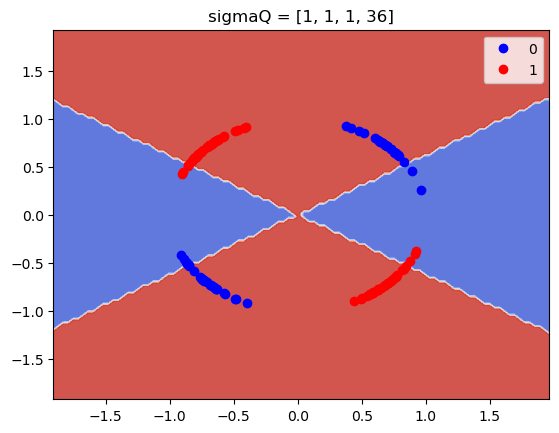

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


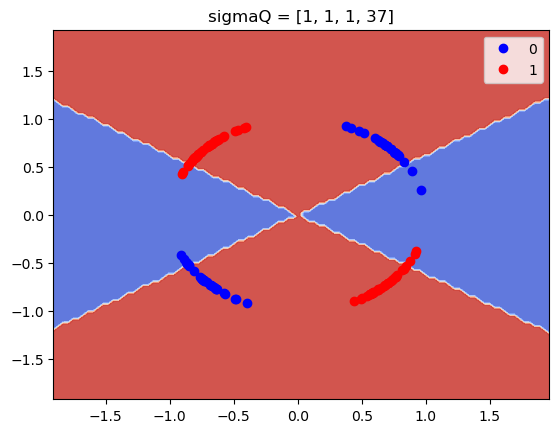

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


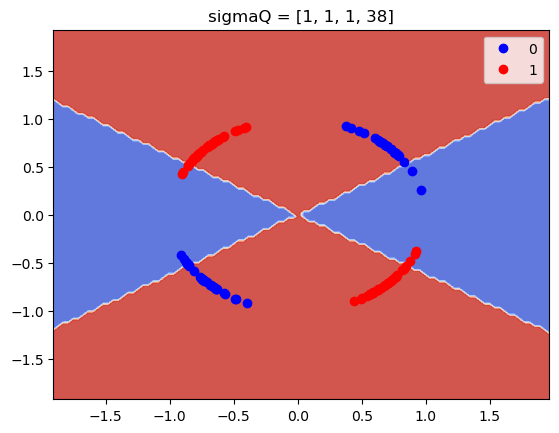

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


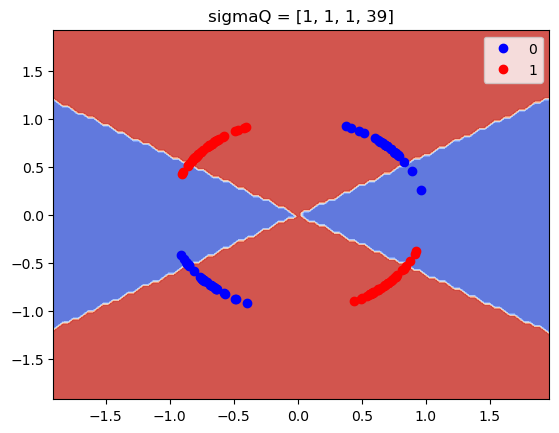

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


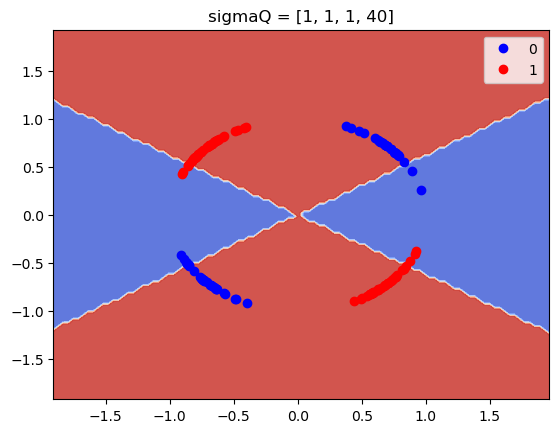

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


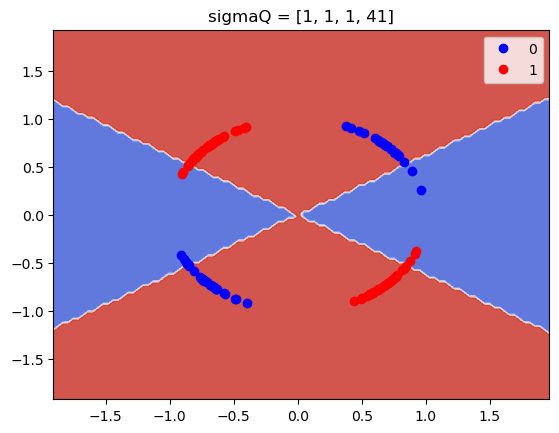

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


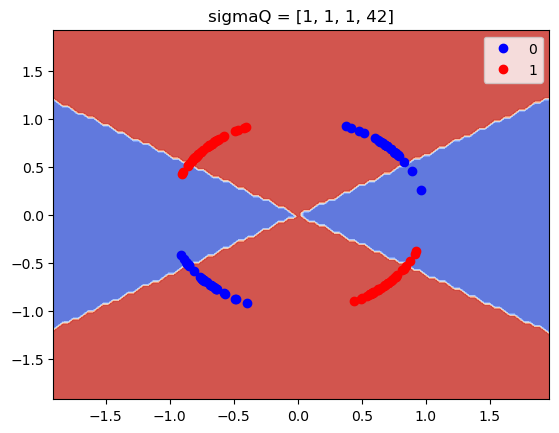

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


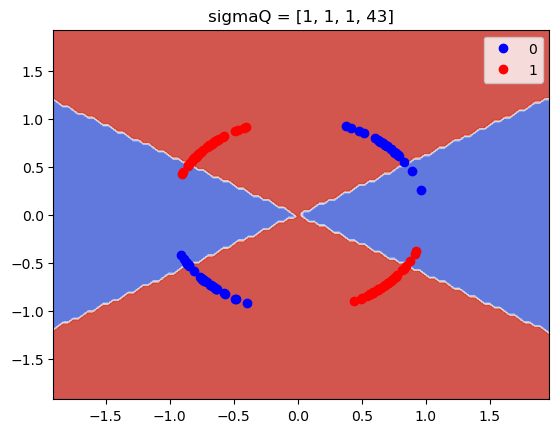

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


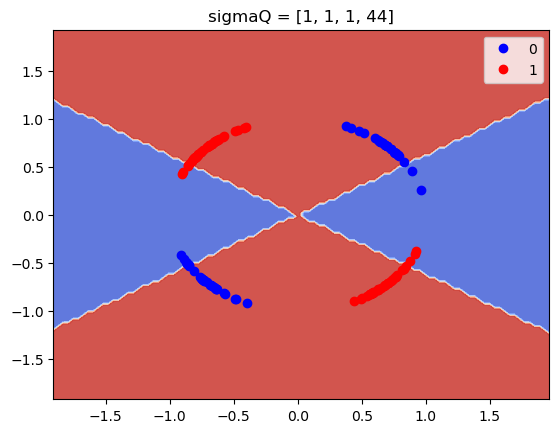

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


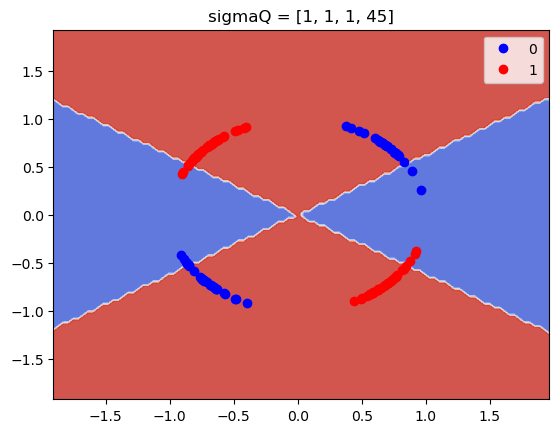

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


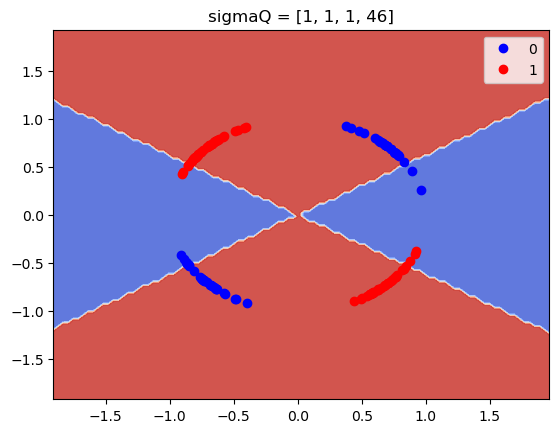

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


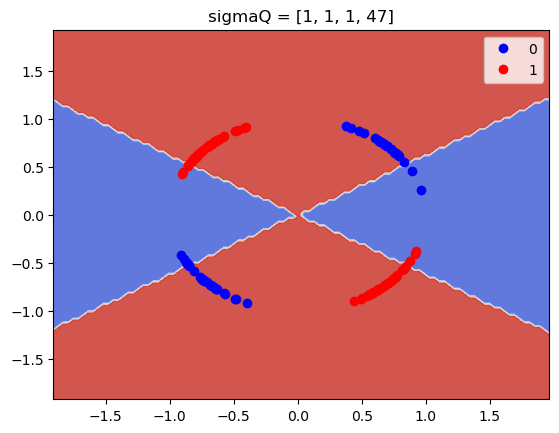

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


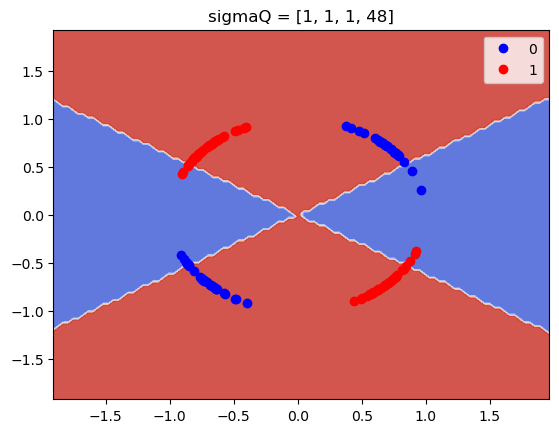

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


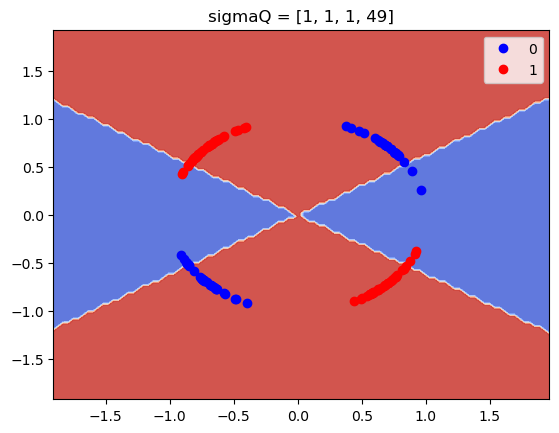

CPU times: total: 1min 7s
Wall time: 1h 16min 15s


In [9]:
%%time
for i in sigmaq_range:
    dic_classifier_params["sigma_q_params"] = [1, 1, 1, i]
    clf = OneVsRestClassifier(IQCClassifier(
                        classifier_function=classifier_function, 
                        dic_classifier_params=dic_classifier_params,
                        dic_training_params=dic_training_params),
                        n_jobs=-1, verbose=1).fit(normalized_X_train, y_train)
    title = "sigmaQ = " + str(dic_classifier_params["sigma_q_params"])
    path = "results/xor/SigmaI=" + str(i) + "; Others=[1,1,1].png"
    decision_visualization(clf = clf, X = normalized_X_test, y = y_test, title = title, saveFigPath = path)